## Simple Sine Data


In [2]:
# Modified cell for dataset creation with influential exogenous variables
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Parameters
n_timesteps = 365  # One year
trend_slope = 0.05  # Upward trend
seasonal_amplitude = 3
seasonal_period = 30  # Monthly seasonality
noise_std = 0.3
np.random.seed(42)  # For reproducibility

# Create time index
dates = pd.date_range('2020-01-01', periods=n_timesteps, freq='D')

# Generate base components
time_numeric = np.arange(n_timesteps)
trend = 10 + trend_slope * time_numeric
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables first
# 1. Temperature (with seasonal pattern)
temp_seasonal = 15 + 10 * np.sin(2 * np.pi * time_numeric / 365 + np.pi)  # Opposite phase of seasonality
temp_noise = np.random.randn(n_timesteps) * 2
temperature = temp_seasonal + temp_noise

# 2. Calendar features
day_of_week = dates.dayofweek  # 0=Monday, 6=Sunday
is_weekend = (day_of_week >= 5).astype(int)
month = dates.month
day_of_week_sin = np.sin(2 * np.pi * day_of_week / 7)
day_of_week_cos = np.cos(2 * np.pi * day_of_week / 7)
day_of_month_sin = np.sin(2 * np.pi * dates.day / 30)
day_of_month_cos = np.cos(2 * np.pi * dates.day / 30)
month_sin = np.sin(2 * np.pi * month / 12)
month_cos = np.cos(2 * np.pi * month / 12)

# 3. Holidays (random holidays + fixed major holidays)
is_holiday = np.zeros(n_timesteps)
# Major holidays (approximate dates for demonstration)
major_holidays = [0, 31, 59, 120, 185, 245, 335, 358]  # Approx: Jan 1, Feb 1, Mar 1, May 1, Jul 5, Sep 2, Dec 1, Dec 24
for day in major_holidays:
    if day < n_timesteps:
        is_holiday[day] = 1

# Add some random holidays
random_holidays = np.random.choice(range(n_timesteps), size=10, replace=False)
is_holiday[random_holidays] = 1

# 4. Special event (e.g., promotion period)
is_promotion = np.zeros(n_timesteps)
promotion_periods = [(60, 75), (180, 195), (300, 315)]  # Three promotion periods
for start, end in promotion_periods:
    is_promotion[start:end] = 1

# Now make the target variable influenced by exogenous variables
# Temperature effect: higher temperature reduces the value
temp_effect = -0.2 * (temperature - 15)  # Normalized effect

# Weekend effect: weekends have different patterns
weekend_effect = 2.0 * is_weekend

# Holiday effect: holidays cause spikes
holiday_effect = 5.0 * is_holiday

# Promotion effect: promotions cause significant increases
promotion_effect = 8.0 * is_promotion

# Combine all effects with base components
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect
noise = np.random.randn(n_timesteps) * noise_std

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame with target and components
df = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
df.head()

,value,trend,seasonality,exog_effects,noise,temperature,is_weekend,is_holiday,is_promotion,day_of_week_sin,day_of_week_cos,day_of_month_sin,day_of_month_cos,month_sin,month_cos
2020-01-01,14.680948,10.00,0.000000,4.801314,-0.120366,15.993428,0,1.0,0.0,0.974928,-0.222521,0.207912,0.978148,0.5,0.866025
2020-01-02,10.909881,10.05,0.623735,0.089732,0.146413,14.551338,0,0.0,0.0,0.433884,-0.900969,0.406737,0.913545,0.5,0.866025
2020-01-03,11.604018,10.10,1.220210,-0.190232,0.474040,15.951161,0,0.0,0.0,-0.433884,-0.900969,0.587785,0.809017,0.5,0.866025
2020-01-04,13.371428,10.15,1.763356,1.494027,-0.035955,17.529863,1,0.0,0.0,-0.974928,-0.222521,0.743145,0.669131,0.5,0.866025
2020-01-05,14.694820,10.20,2.229434,2.231266,0.034119,13.843669,1,0.0,0.0,-0.781831,0.623490,0.866025,0.500000,0.5,0.866025


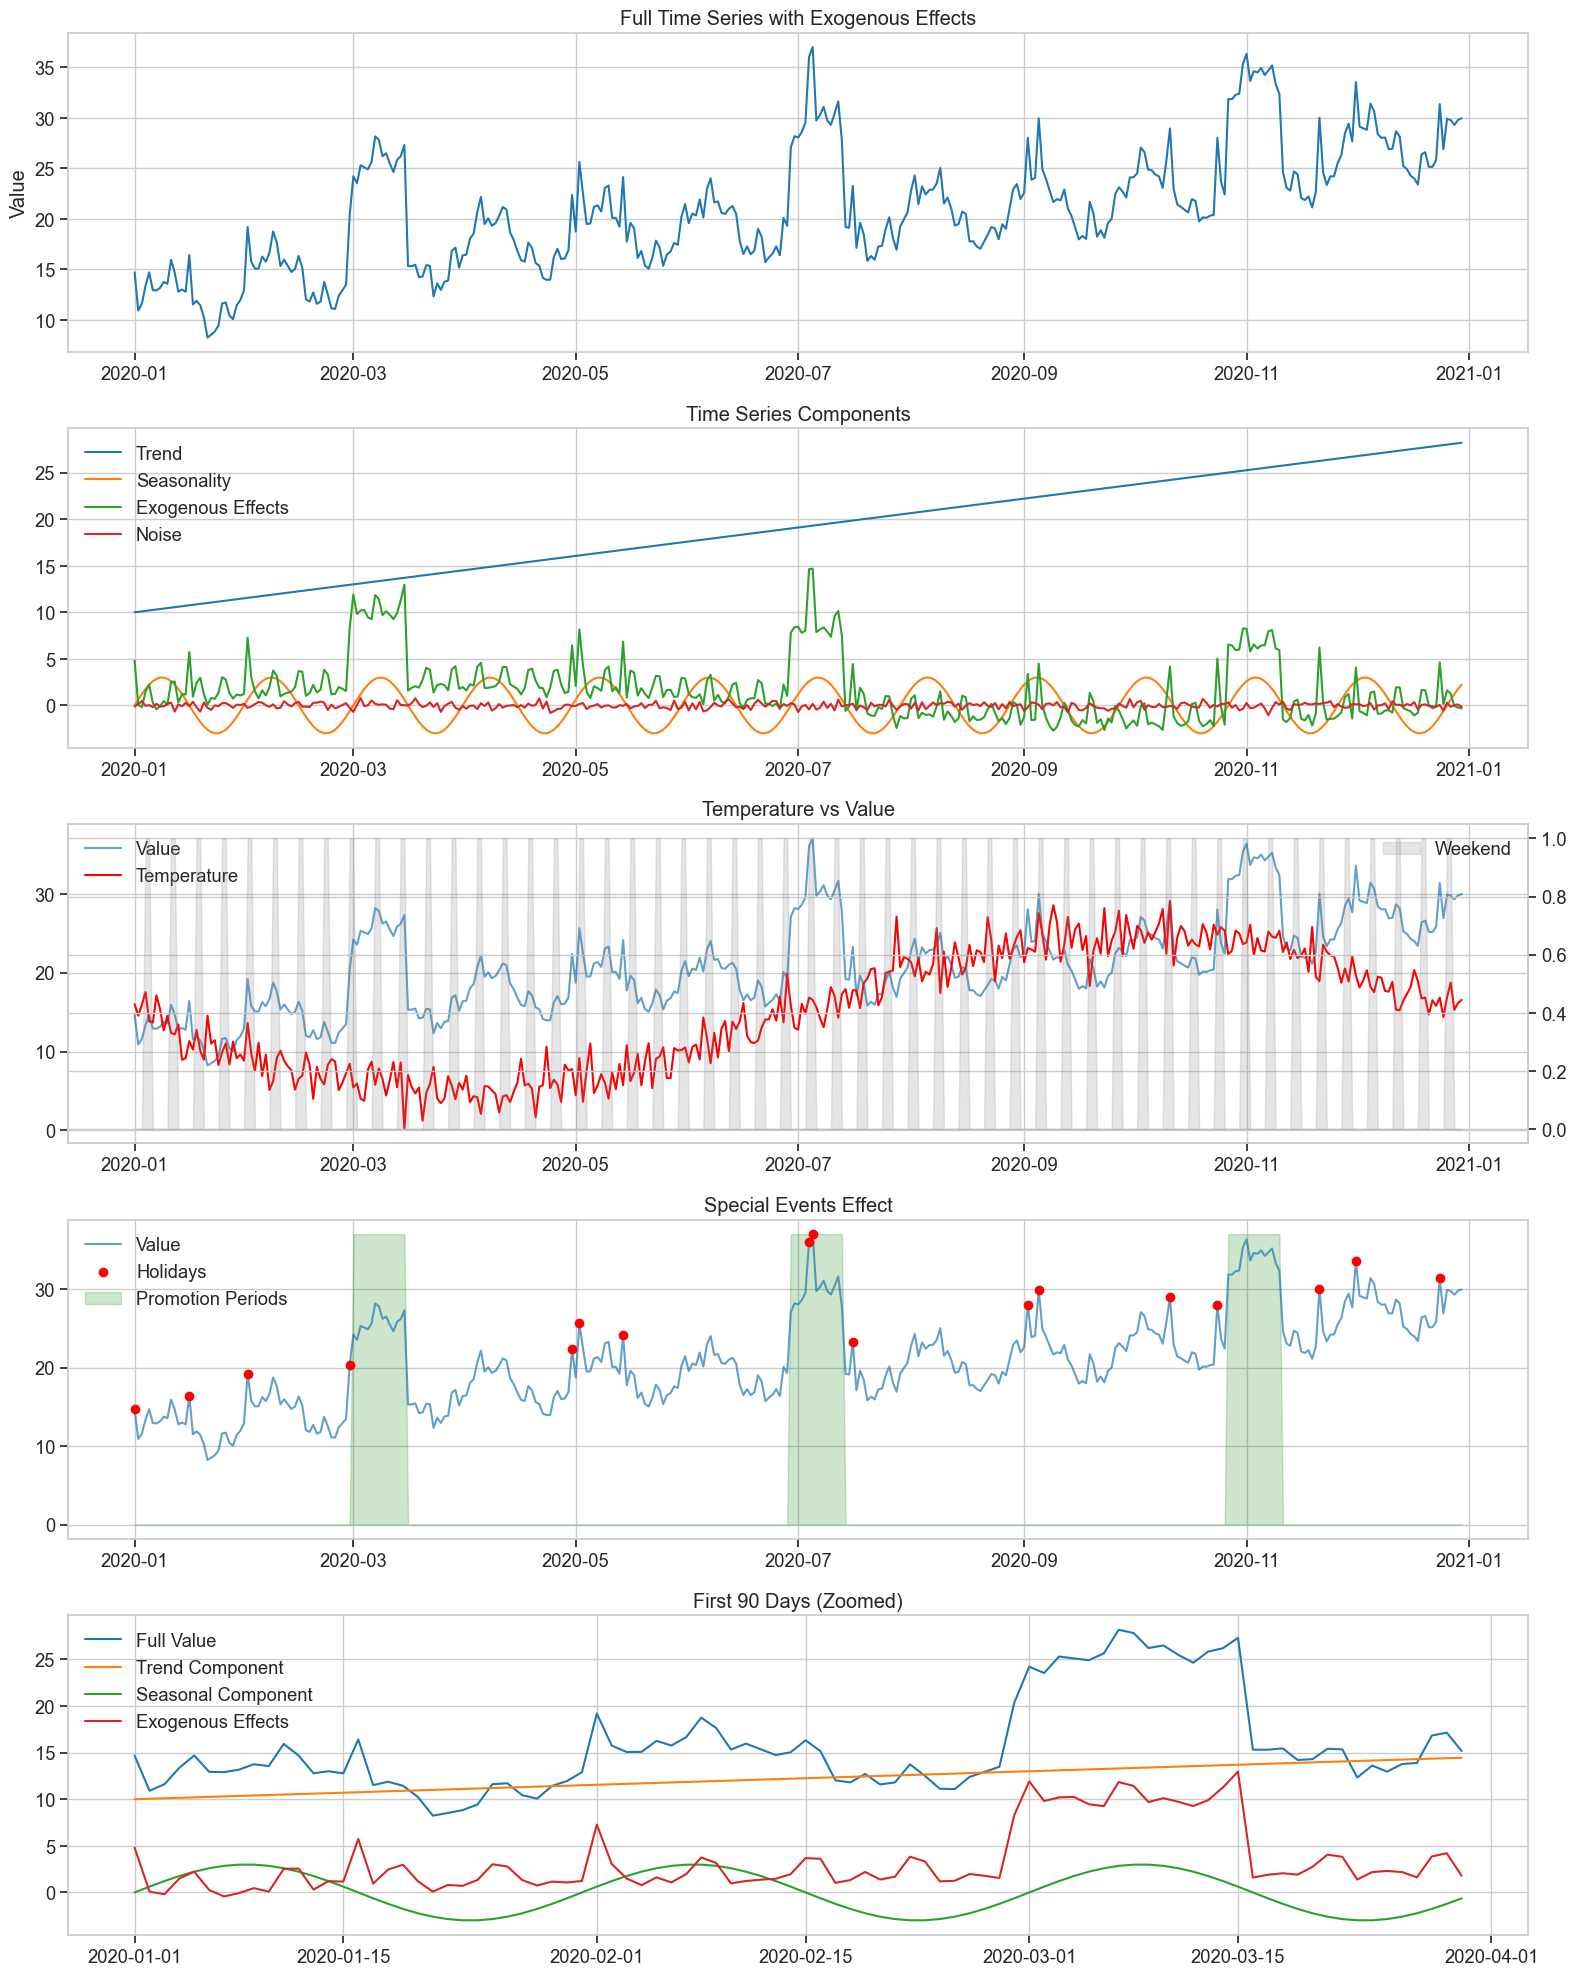

In [3]:
# Plot the data with exogenous variable effects
plt.figure(figsize=(16, 20))

# Plot 1: Full time series
plt.subplot(5, 1, 1)
plt.plot(df.index, df['value'])
plt.title('Full Time Series with Exogenous Effects')
plt.ylabel('Value')

# Plot 2: Base components
plt.subplot(5, 1, 2)
plt.plot(df.index, df['trend'], label='Trend')
plt.plot(df.index, df['seasonality'], label='Seasonality')
plt.plot(df.index, df['exog_effects'], label='Exogenous Effects')
plt.plot(df.index, df['noise'], label='Noise')
plt.title('Time Series Components')
plt.legend()

# Plot 3: Temperature effect
plt.subplot(5, 1, 3)
plt.plot(df.index, df['value'], label='Value', alpha=0.7)
plt.plot(df.index, df['temperature'], label='Temperature', color='red')
plt.title('Temperature vs Value')
plt.legend()
plt.twinx()
plt.fill_between(df.index, 0, df['is_weekend'], alpha=0.2, label='Weekend', color='gray')
plt.legend(loc='upper right')

# Plot 4: Special events
plt.subplot(5, 1, 4)
plt.plot(df.index, df['value'], label='Value', alpha=0.7)
plt.scatter(df.index[df['is_holiday'] == 1], 
           df['value'][df['is_holiday'] == 1], 
           color='red', label='Holidays', zorder=5)
plt.fill_between(df.index, 0, df['is_promotion'] * max(df['value']), 
                alpha=0.2, label='Promotion Periods', color='green')
plt.title('Special Events Effect')
plt.legend()

# Plot 5: Zoomed in view (first 90 days)
plt.subplot(5, 1, 5)
plt.plot(df.index[:90], df['value'][:90], label='Full Value')
plt.plot(df.index[:90], df['trend'][:90], label='Trend Component')
plt.plot(df.index[:90], df['seasonality'][:90], label='Seasonal Component')
plt.plot(df.index[:90], df['exog_effects'][:90], label='Exogenous Effects')
plt.title('First 90 Days (Zoomed)')
plt.legend()

plt.tight_layout()
plt.show()

## LSTM Test

Epoch [5/50], Loss: 0.0239
Epoch [10/50], Loss: 0.0183
Epoch [15/50], Loss: 0.0131
Epoch [20/50], Loss: 0.0107
Epoch [25/50], Loss: 0.0072
Epoch [30/50], Loss: 0.0070
Epoch [35/50], Loss: 0.0069
Epoch [40/50], Loss: 0.0071
Epoch [45/50], Loss: 0.0070
Epoch [50/50], Loss: 0.0071
Training completed in 4.63 seconds

LSTM Performance Metrics:
Test MSE: 18.1106
Test RMSE: 4.2557
Test MAE: 3.7009
Inference time: 0.0116 seconds


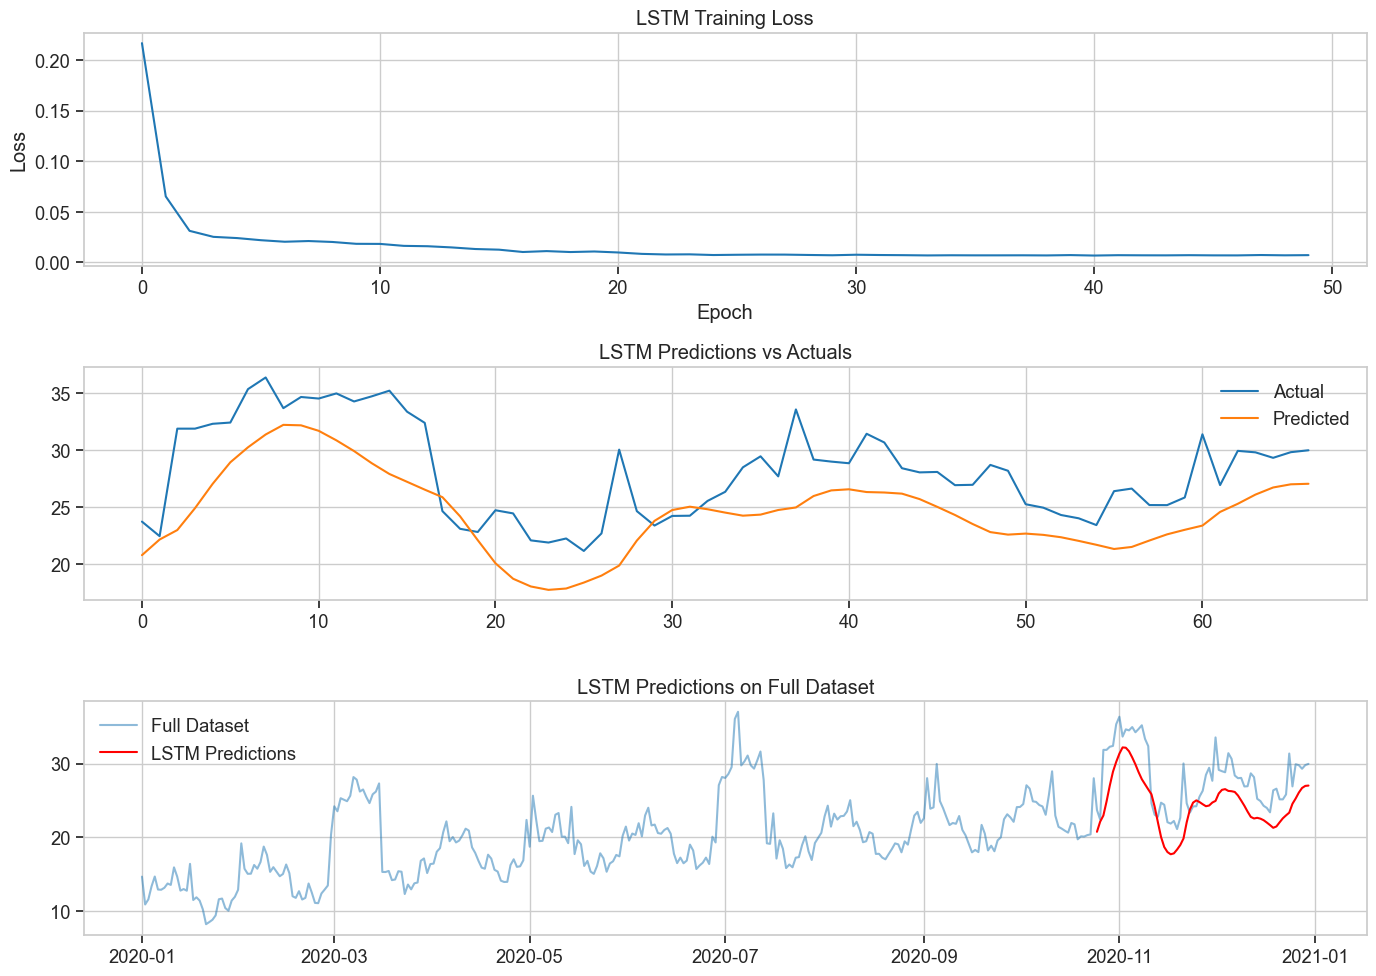

In [4]:
# Import necessary libraries for training
import torch.optim as optim
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import time
from models.lstm import LSTMModel

# Create sequences function
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Parameters
sequence_length = 30  # Use 30 days of history to predict the next day
lookforward = 7  # Predict 7 days ahead (for multi-step forecasting)
test_ratio = 0.2  # 20% test split

# Scale the data
lstm_scaler = MinMaxScaler()
lstm_values_scaled = lstm_scaler.fit_transform(df[['value']].values)

# Create sequences
lstm_X, lstm_y = create_sequences(lstm_values_scaled, sequence_length)

# Split into train and test sets
lstm_test_size = int(len(lstm_X) * test_ratio)
lstm_train_size = len(lstm_X) - lstm_test_size
lstm_X_train, lstm_X_test = lstm_X[:lstm_train_size], lstm_X[lstm_train_size:]
lstm_y_train, lstm_y_test = lstm_y[:lstm_train_size], lstm_y[lstm_train_size:]

# Convert to PyTorch tensors
lstm_X_train = torch.FloatTensor(lstm_X_train)
lstm_y_train = torch.FloatTensor(lstm_y_train)
lstm_X_test = torch.FloatTensor(lstm_X_test)
lstm_y_test = torch.FloatTensor(lstm_y_test)

# Create data loaders
batch_size = 32
lstm_train_dataset = TensorDataset(lstm_X_train, lstm_y_train)
lstm_test_dataset = TensorDataset(lstm_X_test, lstm_y_test)
lstm_train_loader = DataLoader(lstm_train_dataset, batch_size=batch_size, shuffle=True)
lstm_test_loader = DataLoader(lstm_test_dataset, batch_size=batch_size, shuffle=False)

# Initialize model, loss function, and optimizer
input_size = 1  # Single feature (value)
lstm_model = LSTMModel(input_size=input_size, hidden_size=64, num_layers=2)
lstm_criterion = nn.MSELoss()
lstm_optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)

# Training
num_epochs = 50
lstm_train_losses = []
lstm_start_time = time.time()

for epoch in range(num_epochs):
    lstm_model.train()
    lstm_running_loss = 0.0
    
    for inputs, targets in lstm_train_loader:
        # Forward pass
        lstm_outputs = lstm_model(inputs)
        lstm_loss = lstm_criterion(lstm_outputs, targets)
        
        # Backward and optimize
        lstm_optimizer.zero_grad()
        lstm_loss.backward()
        lstm_optimizer.step()
        
        lstm_running_loss += lstm_loss.item()
    
    lstm_avg_loss = lstm_running_loss / len(lstm_train_loader)
    lstm_train_losses.append(lstm_avg_loss)
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {lstm_avg_loss:.4f}')

lstm_training_time = time.time() - lstm_start_time
print(f"Training completed in {lstm_training_time:.2f} seconds")

# Evaluation
lstm_model.eval()
lstm_predictions = []
lstm_actuals = []
lstm_inference_start = time.time()

with torch.no_grad():
    for inputs, targets in lstm_test_loader:
        outputs = lstm_model(inputs)
        lstm_predictions.append(outputs.numpy())
        lstm_actuals.append(targets.numpy())
    
    # Concatenate batches
    lstm_predictions = np.concatenate(lstm_predictions)
    lstm_actuals = np.concatenate(lstm_actuals)
    
    # Inverse transform to original scale
    lstm_predictions = lstm_scaler.inverse_transform(lstm_predictions)
    lstm_actuals = lstm_scaler.inverse_transform(lstm_actuals)

lstm_inference_time = time.time() - lstm_inference_start

# Calculate metrics
lstm_mse = mean_squared_error(lstm_actuals, lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(lstm_actuals, lstm_predictions)

print(f"\nLSTM Performance Metrics:")
print(f"Test MSE: {lstm_mse:.4f}")
print(f"Test RMSE: {lstm_rmse:.4f}")
print(f"Test MAE: {lstm_mae:.4f}")
print(f"Inference time: {lstm_inference_time:.4f} seconds")

# Plot results
plt.figure(figsize=(14, 10))

# Plot 1: Training loss
plt.subplot(3, 1, 1)
plt.plot(lstm_train_losses)
plt.title('LSTM Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot 2: Predictions vs actuals
plt.subplot(3, 1, 2)
plt.plot(lstm_actuals, label='Actual')
plt.plot(lstm_predictions, label='Predicted')
plt.title('LSTM Predictions vs Actuals')
plt.legend()

# Plot 3: Predictions in context of the original data
plt.subplot(3, 1, 3)
plt.plot(df.index, df['value'], label='Full Dataset', alpha=0.5)
lstm_pred_dates = df.index[sequence_length + lstm_train_size:sequence_length + lstm_train_size + len(lstm_predictions)]
plt.plot(lstm_pred_dates, lstm_predictions, label='LSTM Predictions', color='red')
plt.title('LSTM Predictions on Full Dataset')
plt.legend()

plt.tight_layout()
plt.show()

# Store results for later comparison
lstm_results = {
    'model': 'LSTM',
    'mse': lstm_mse,
    'rmse': lstm_rmse,
    'mae': lstm_mae,
    'training_time': lstm_training_time,
    'inference_time': lstm_inference_time,
    'predictions': lstm_predictions,
    'actuals': lstm_actuals,
    'prediction_dates': lstm_pred_dates
}

Input shape: (329, 30, 1)
Target shape: (329, 7)
Epoch [5/50], Loss: 0.0240
Epoch [10/50], Loss: 0.0229
Epoch [15/50], Loss: 0.0210
Epoch [20/50], Loss: 0.0160
Epoch [25/50], Loss: 0.0101
Epoch [30/50], Loss: 0.0088
Epoch [35/50], Loss: 0.0091
Epoch [40/50], Loss: 0.0079
Epoch [45/50], Loss: 0.0070
Epoch [50/50], Loss: 0.0077
Training completed in 4.05 seconds

LSTM Multi-Horizon Performance Metrics:
Test MSE: 14.7822
Test RMSE: 3.8448
Test MAE: 3.0503
Training time: 4.05 seconds
Inference time: 0.0087 seconds


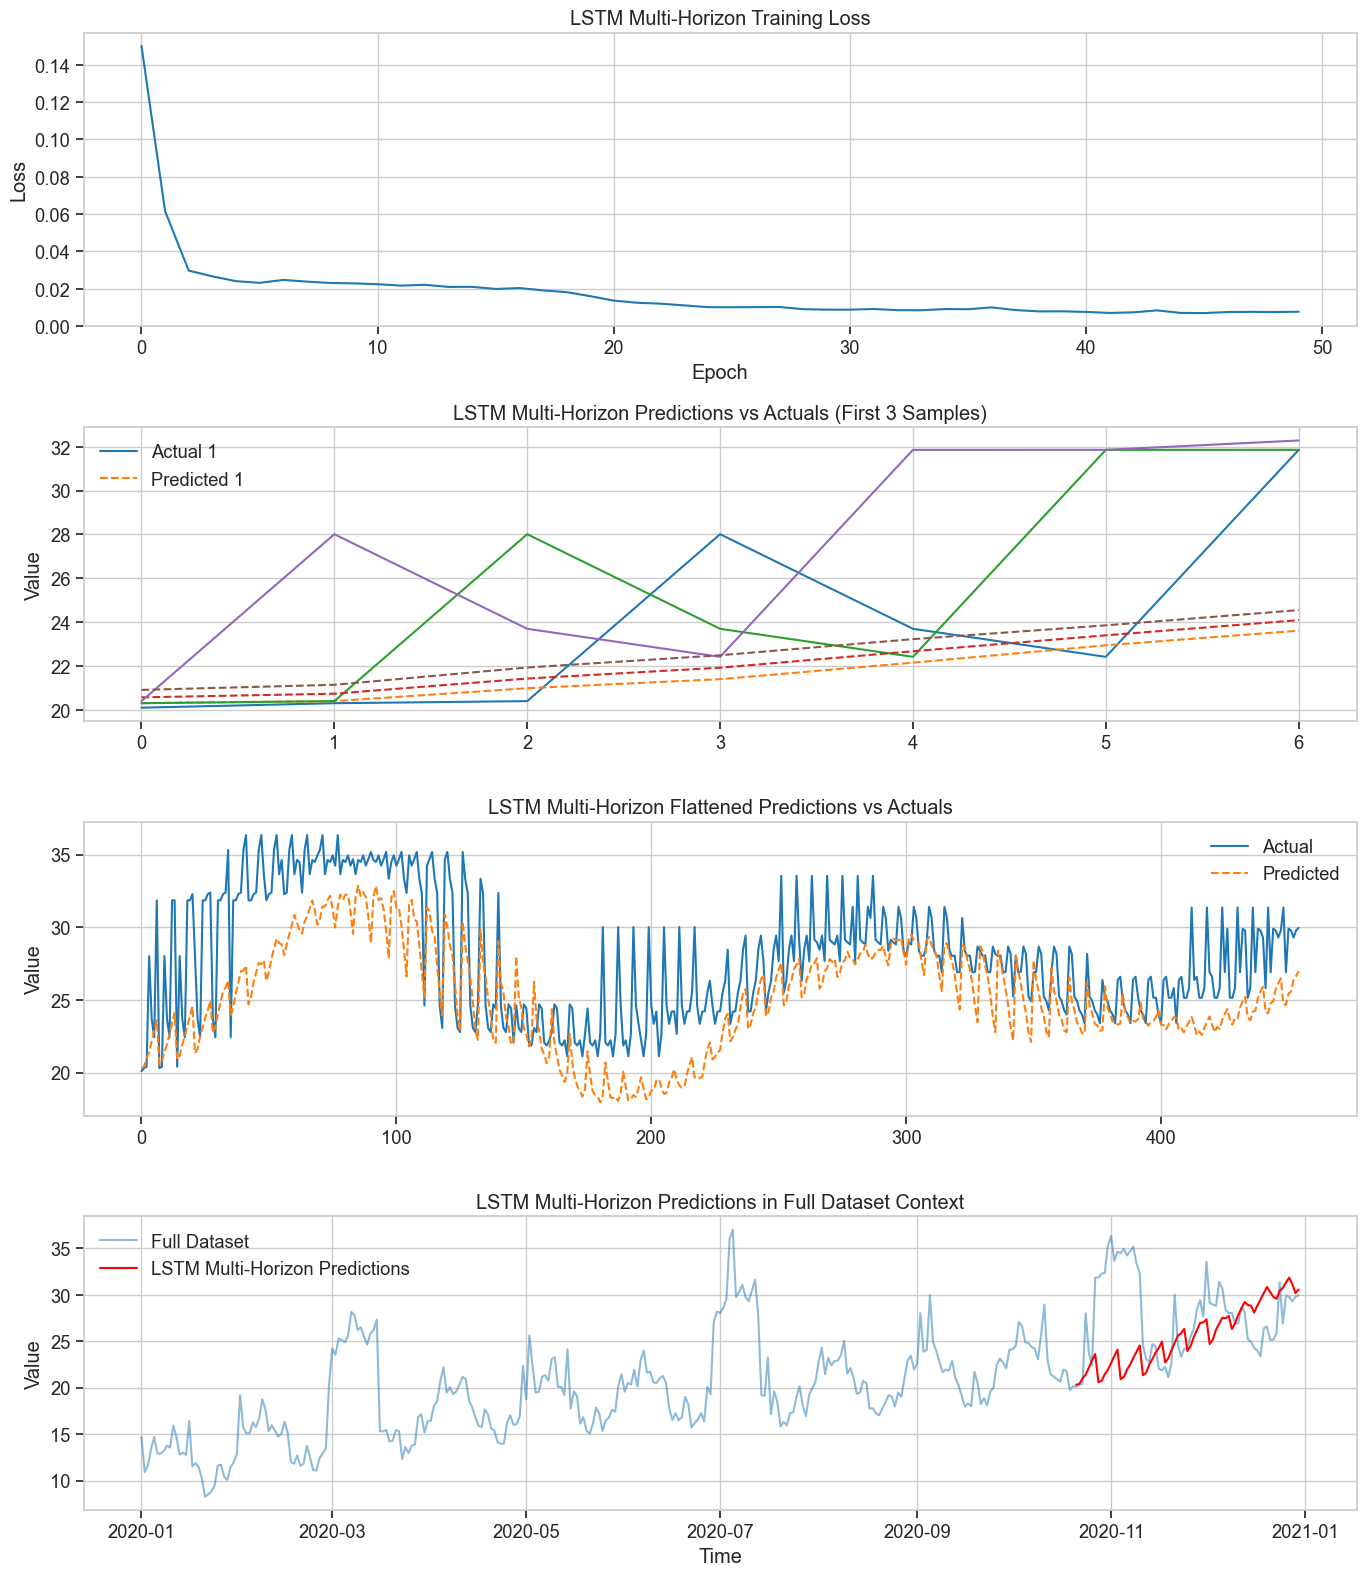


Model Comparison:
                   Model        MSE      RMSE       MAE  Training Time (s)  \
0       LSTM Single-Step  18.110609  4.255656  3.700891           4.625718   
1     LSTM Multi-Horizon  14.782201  3.844763  3.050267           4.053293   
2  NBEATSx Multi-Horizon  29.334412  5.416125  4.544401         104.428068   

   Inference Time (s)  
0            0.011621  
1            0.008650  
2            0.683620  


In [ ]:
# Import necessary libraries for training
import torch.optim as optim
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import time
from models.lstm import LSTMModel  # We'll need to modify this model

# Modified LSTM model to support multi-horizon forecasting
class LSTMMultiHorizon(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, forecast_horizon):
        super(LSTMMultiHorizon, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, forecast_horizon)
        
    def forward(self, x):
        # x shape: [batch_size, sequence_length, input_size]
        lstm_out, _ = self.lstm(x)
        # Use only the last time step's output for prediction
        out = self.fc(lstm_out[:, -1, :])
        # out shape: [batch_size, forecast_horizon]
        return out

# Modified sequence creation function for multi-horizon forecasting
def create_multi_horizon_sequences(data, seq_length, horizon):
    X, y = [], []
    for i in range(len(data) - seq_length - horizon + 1):
        X.append(data[i:i+seq_length])
        # Target now includes multiple future steps
        y.append(data[i+seq_length:i+seq_length+horizon, 0])
    return np.array(X), np.array(y)

# Parameters
sequence_length = 30  # Use 30 days of history
forecast_horizon = 7  # Predict 7 days ahead (multi-horizon forecasting)
test_ratio = 0.2  # 20% test split

# Scale the data
lstm_scaler = MinMaxScaler()
lstm_values_scaled = lstm_scaler.fit_transform(df[['value']].values)

# Create sequences for multi-horizon forecasting
lstm_X, lstm_y = create_multi_horizon_sequences(lstm_values_scaled, sequence_length, forecast_horizon)

print(f"Input shape: {lstm_X.shape}")
print(f"Target shape: {lstm_y.shape}")

# Split into train and test sets
lstm_test_size = int(len(lstm_X) * test_ratio)
lstm_train_size = len(lstm_X) - lstm_test_size
lstm_X_train, lstm_X_test = lstm_X[:lstm_train_size], lstm_X[lstm_train_size:]
lstm_y_train, lstm_y_test = lstm_y[:lstm_train_size], lstm_y[lstm_train_size:]

# Convert to PyTorch tensors
lstm_X_train = torch.FloatTensor(lstm_X_train)
lstm_y_train = torch.FloatTensor(lstm_y_train)
lstm_X_test = torch.FloatTensor(lstm_X_test)
lstm_y_test = torch.FloatTensor(lstm_y_test)

# Create data loaders
batch_size = 32
lstm_train_dataset = TensorDataset(lstm_X_train, lstm_y_train)
lstm_test_dataset = TensorDataset(lstm_X_test, lstm_y_test)
lstm_train_loader = DataLoader(lstm_train_dataset, batch_size=batch_size, shuffle=True)
lstm_test_loader = DataLoader(lstm_test_dataset, batch_size=batch_size, shuffle=False)

# Initialize model, loss function, and optimizer
input_size = 1  # Single feature (value)
hidden_size = 64
num_layers = 2
lstm_model = LSTMMultiHorizon(input_size, hidden_size, num_layers, forecast_horizon)
lstm_criterion = nn.MSELoss()
lstm_optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)

# Training
num_epochs = 50
lstm_train_losses = []
lstm_start_time = time.time()

for epoch in range(num_epochs):
    lstm_model.train()
    lstm_running_loss = 0.0
    
    for inputs, targets in lstm_train_loader:
        # Forward pass
        lstm_outputs = lstm_model(inputs)
        lstm_loss = lstm_criterion(lstm_outputs, targets)
        
        # Backward and optimize
        lstm_optimizer.zero_grad()
        lstm_loss.backward()
        lstm_optimizer.step()
        
        lstm_running_loss += lstm_loss.item()
    
    lstm_avg_loss = lstm_running_loss / len(lstm_train_loader)
    lstm_train_losses.append(lstm_avg_loss)
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {lstm_avg_loss:.4f}')

lstm_training_time = time.time() - lstm_start_time
print(f"Training completed in {lstm_training_time:.2f} seconds")

# Evaluation
lstm_model.eval()
lstm_predictions = []
lstm_actuals = []
lstm_inference_start = time.time()

with torch.no_grad():
    for inputs, targets in lstm_test_loader:
        outputs = lstm_model(inputs)
        lstm_predictions.append(outputs.numpy())
        lstm_actuals.append(targets.numpy())
    
    # Concatenate batches
    lstm_predictions = np.concatenate(lstm_predictions)
    lstm_actuals = np.concatenate(lstm_actuals)
    
    # Inverse transform to original scale
    # We need to reshape predictions and actuals for inverse transformation
    pred_shape = lstm_predictions.shape
    act_shape = lstm_actuals.shape
    
    # Reshape to 2D for scaling
    lstm_predictions_flat = lstm_predictions.reshape(-1, 1)
    lstm_actuals_flat = lstm_actuals.reshape(-1, 1)
    
    # Inverse scale
    lstm_predictions_orig_flat = lstm_scaler.inverse_transform(lstm_predictions_flat)
    lstm_actuals_orig_flat = lstm_scaler.inverse_transform(lstm_actuals_flat)
    
    # Reshape back to original shape
    lstm_predictions_orig = lstm_predictions_orig_flat.reshape(pred_shape)
    lstm_actuals_orig = lstm_actuals_orig_flat.reshape(act_shape)

lstm_inference_time = time.time() - lstm_inference_start

# Calculate metrics on flattened data
lstm_mse = mean_squared_error(lstm_actuals_orig.flatten(), lstm_predictions_orig.flatten())
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(lstm_actuals_orig.flatten(), lstm_predictions_orig.flatten())

print(f"\nLSTM Multi-Horizon Performance Metrics:")
print(f"Test MSE: {lstm_mse:.4f}")
print(f"Test RMSE: {lstm_rmse:.4f}")
print(f"Test MAE: {lstm_mae:.4f}")
print(f"Training time: {lstm_training_time:.2f} seconds")
print(f"Inference time: {lstm_inference_time:.4f} seconds")

# Plot results
plt.figure(figsize=(14, 16))

# Plot 1: Training loss
plt.subplot(4, 1, 1)
plt.plot(lstm_train_losses)
plt.title('LSTM Multi-Horizon Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Plot 2: Predictions vs actuals (first 3 samples)
plt.subplot(4, 1, 2)
for i in range(min(3, len(lstm_actuals_orig))):
    plt.plot(lstm_actuals_orig[i], label=f'Actual {i+1}' if i == 0 else "")
    plt.plot(lstm_predictions_orig[i], label=f'Predicted {i+1}' if i == 0 else "", linestyle='--')
plt.title('LSTM Multi-Horizon Predictions vs Actuals (First 3 Samples)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Plot 3: Flattened actuals vs predictions across entire test set
plt.subplot(4, 1, 3)
actuals_flat = lstm_actuals_orig.reshape(-1)
predictions_flat = lstm_predictions_orig.reshape(-1)
plt.plot(actuals_flat, label='Actual')
plt.plot(predictions_flat, label='Predicted', linestyle='--')
plt.title('LSTM Multi-Horizon Flattened Predictions vs Actuals')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Plot 4: Predictions in context of the original full dataset
plt.subplot(4, 1, 4)
plt.plot(df.index, df['value'], label='Full Dataset', alpha=0.5)
# Calculate dates for plotting
lstm_pred_dates = df.index[sequence_length + lstm_train_size:sequence_length + lstm_train_size + len(predictions_flat)//forecast_horizon * forecast_horizon]
pred_to_plot = predictions_flat[:len(lstm_pred_dates)]  # Avoid index overrun
plt.plot(lstm_pred_dates, pred_to_plot, label='LSTM Multi-Horizon Predictions', color='red')
plt.title('LSTM Multi-Horizon Predictions in Full Dataset Context')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Store results for later comparison
lstm_multi_results = {
    'model': 'LSTM Multi-Horizon',
    'mse': lstm_mse,
    'rmse': lstm_rmse,
    'mae': lstm_mae,
    'training_time': lstm_training_time,
    'inference_time': lstm_inference_time,
    'predictions': lstm_predictions_orig,
    'actuals': lstm_actuals_orig
}


## NBeatsX_v6 Test

Preparing data for NBEATSx model...
Input shape: (329, 30)
Target shape: (329, 7)
Exogenous shape: (329, 30, 10)
Data prepared: 264 training samples, 65 test samples
Starting training...
Epoch [5/50], Loss: 0.1315
Epoch [10/50], Loss: 0.0968
Epoch [15/50], Loss: 0.0595
Epoch [20/50], Loss: 0.0437
Epoch [25/50], Loss: 0.0425
Epoch [30/50], Loss: 0.0372
Epoch [35/50], Loss: 0.0349
Epoch [40/50], Loss: 0.0268
Epoch [45/50], Loss: 0.0247
Epoch [50/50], Loss: 0.0225
Training completed in 126.64 seconds

NBEATSx Performance Metrics:
Test MSE: 22.5778
Test RMSE: 4.7516
Test MAE: 4.0170
Training time: 126.64 seconds
Inference time: 0.8767 seconds


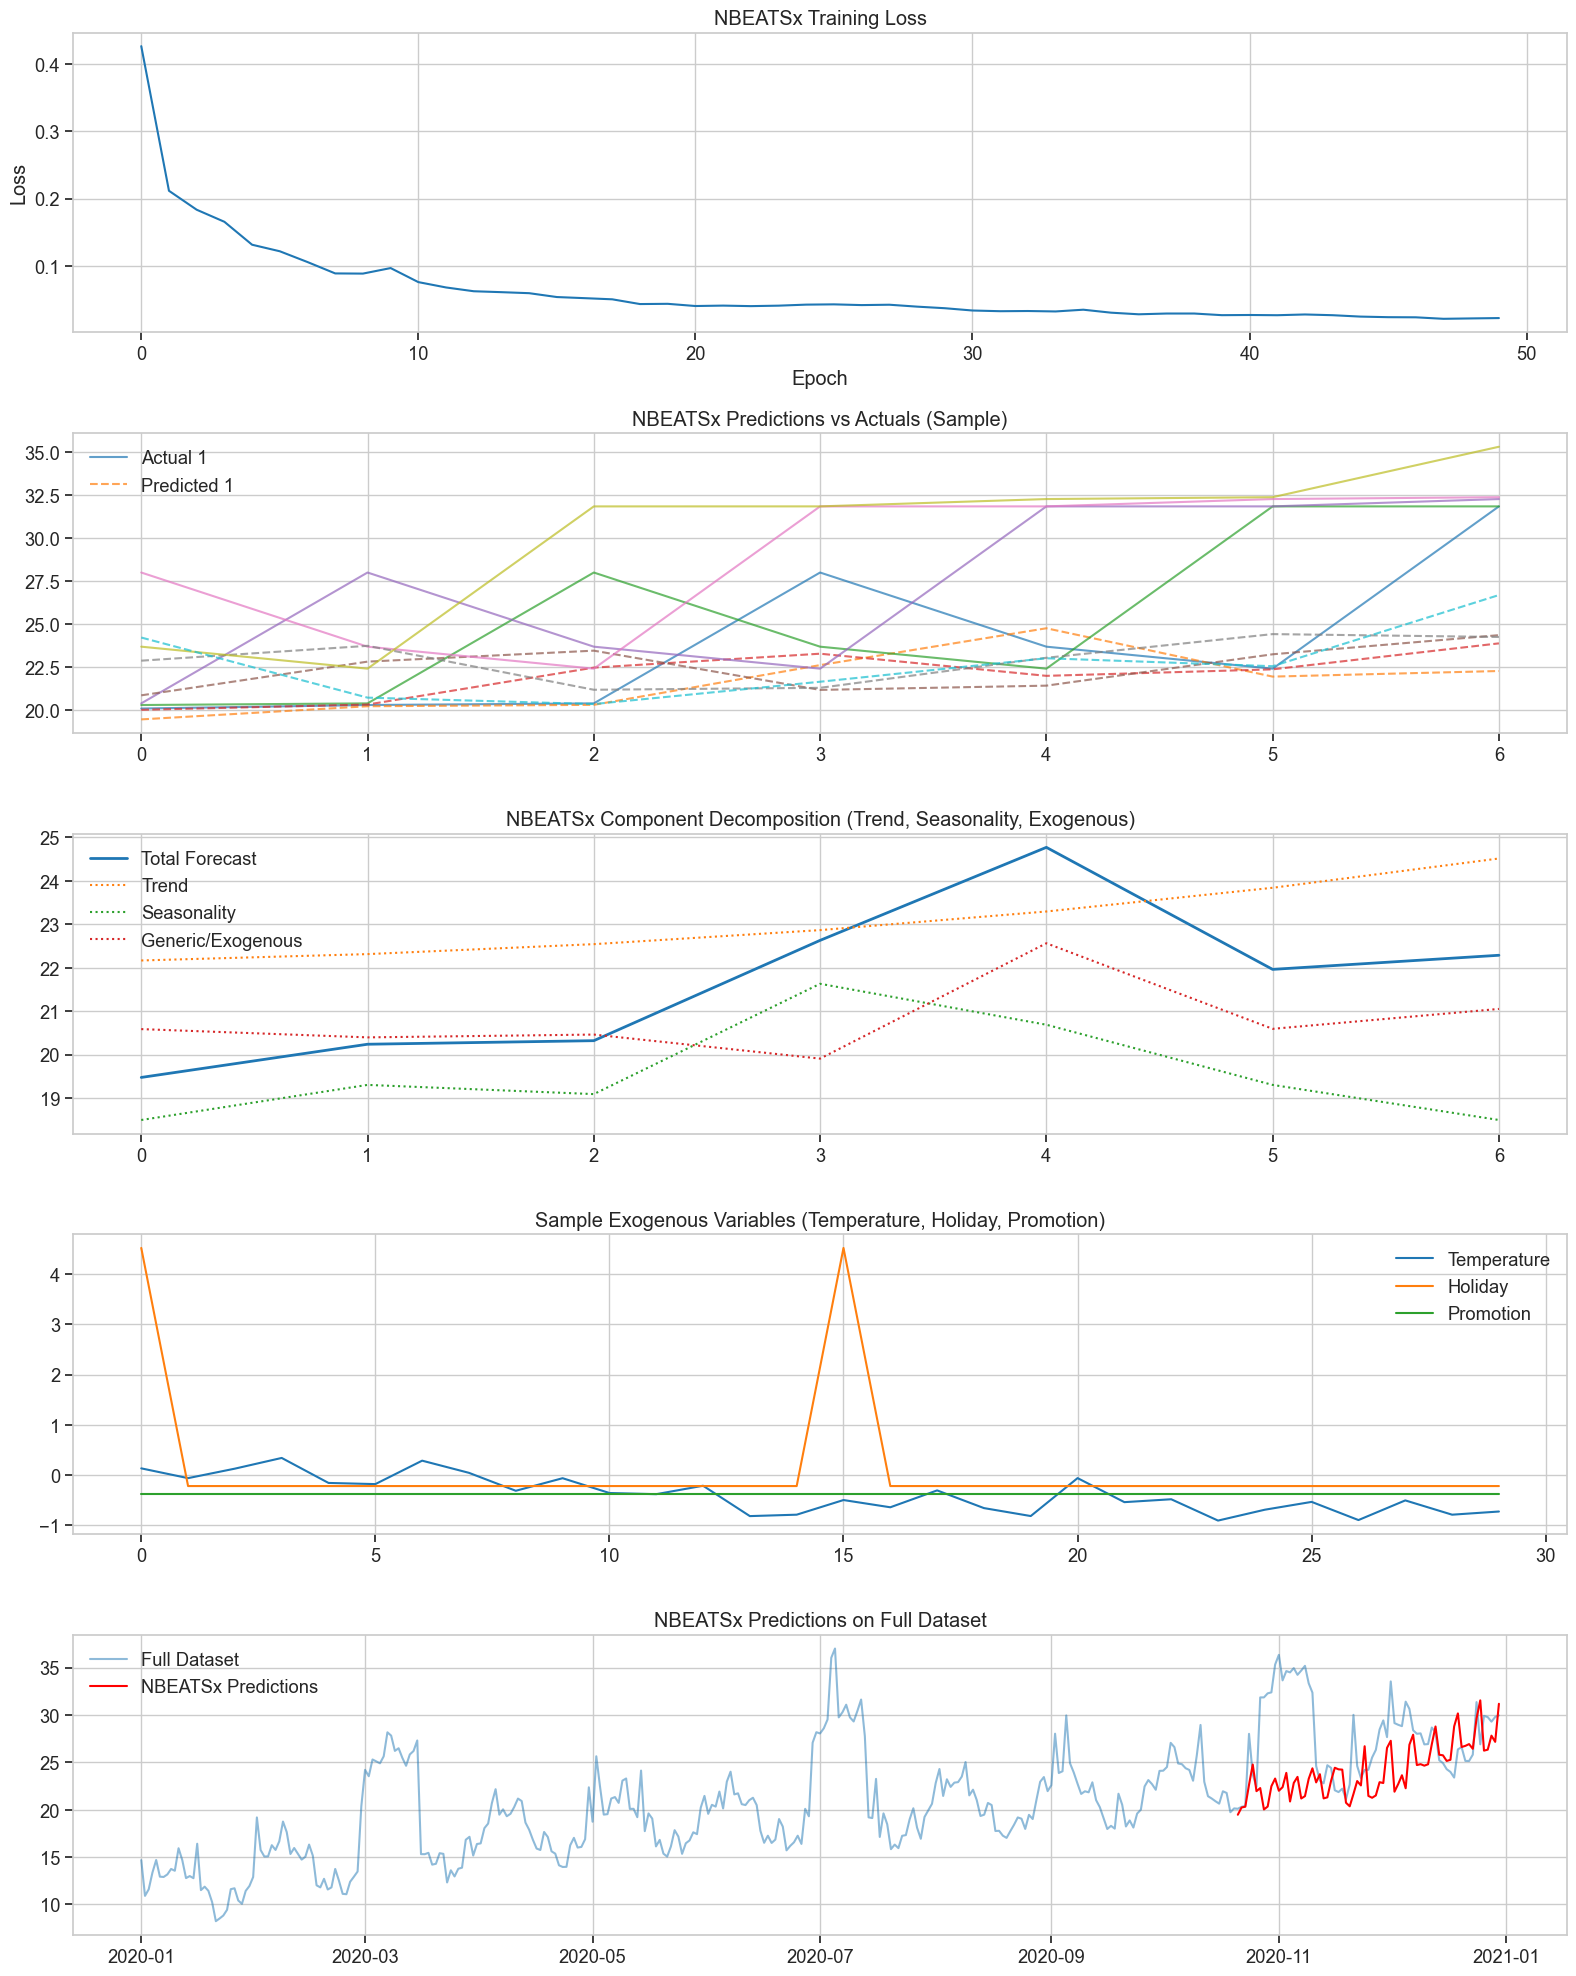


Model Comparison:
     Model        MSE      RMSE       MAE  Training Time (s)  \
0     LSTM  18.110609  4.255656  3.700891           4.625718   
1  NBEATSx  22.577772  4.751607  4.017002         126.642147   

   Inference Time (s)  
0            0.011621  
1            0.876731  

NBEATSx testing completed successfully!


In [5]:
# Import necessary libraries for training
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import time
import matplotlib.pyplot as plt
from models.nbeatsx_v6 import NBEATSx


# Parameters - match LSTM test parameters for fair comparison
nbeatsx_lookback = 30  # Use 30 days of history to predict the next day
nbeatsx_forecast_horizon = 7  # Predict 7 days ahead
nbeatsx_test_ratio = 0.2

# Prepare data for NBEATSx
print("Preparing data for NBEATSx model...")

# Separate target and exogenous variables
target_col = 'value'
exog_cols = ['temperature', 'is_weekend', 'is_holiday', 'is_promotion',
             'day_of_week_sin', 'day_of_week_cos', 'day_of_month_sin', 
             'day_of_month_cos', 'month_sin', 'month_cos']

# Scale target variable
nbeatsx_scaler_y = StandardScaler()
nbeatsx_y_scaled = nbeatsx_scaler_y.fit_transform(df[[target_col]].values)

# Scale exogenous variables
nbeatsx_scaler_x = StandardScaler()
nbeatsx_exog_scaled = nbeatsx_scaler_x.fit_transform(df[exog_cols].values)

# Create sequences with time-varying exogenous variables
def create_nbeatsx_sequences(data, exog_data, lookback, horizon):
    X, y = [], []
    exog = []
    
    for i in range(len(data) - lookback - horizon + 1):
        # Input sequence
        X.append(data[i:i+lookback, 0])
        
        # Target sequence
        y.append(data[i+lookback:i+lookback+horizon, 0])
        
        # Exogenous variables corresponding to input sequence
        exog.append(exog_data[i:i+lookback])
    
    return np.array(X), np.array(y), np.array(exog)

# Create sequences
nbeatsx_X, nbeatsx_y, nbeatsx_exog = create_nbeatsx_sequences(
    nbeatsx_y_scaled, nbeatsx_exog_scaled, nbeatsx_lookback, nbeatsx_forecast_horizon)

# Reshape exogenous variables to match expected format [batch, seq_len, features]
nbeatsx_exog = nbeatsx_exog.reshape(nbeatsx_exog.shape[0], nbeatsx_exog.shape[1], -1)

print(f"Input shape: {nbeatsx_X.shape}")
print(f"Target shape: {nbeatsx_y.shape}")
print(f"Exogenous shape: {nbeatsx_exog.shape}")

# Split into train and test sets
nbeatsx_test_size = int(len(nbeatsx_X) * nbeatsx_test_ratio)
nbeatsx_train_size = len(nbeatsx_X) - nbeatsx_test_size

nbeatsx_X_train = nbeatsx_X[:nbeatsx_train_size]
nbeatsx_y_train = nbeatsx_y[:nbeatsx_train_size]
nbeatsx_exog_train = nbeatsx_exog[:nbeatsx_train_size]

nbeatsx_X_test = nbeatsx_X[nbeatsx_train_size:]
nbeatsx_y_test = nbeatsx_y[nbeatsx_train_size:]
nbeatsx_exog_test = nbeatsx_exog[nbeatsx_train_size:]

# Convert to PyTorch tensors
nbeatsx_X_train_tensor = torch.FloatTensor(nbeatsx_X_train)
nbeatsx_y_train_tensor = torch.FloatTensor(nbeatsx_y_train)
nbeatsx_exog_train_tensor = torch.FloatTensor(nbeatsx_exog_train)

nbeatsx_X_test_tensor = torch.FloatTensor(nbeatsx_X_test)
nbeatsx_y_test_tensor = torch.FloatTensor(nbeatsx_y_test)
nbeatsx_exog_test_tensor = torch.FloatTensor(nbeatsx_exog_test)

# Create data loaders
batch_size = 32
nbeatsx_train_dataset = TensorDataset(nbeatsx_X_train_tensor, nbeatsx_y_train_tensor, nbeatsx_exog_train_tensor)
nbeatsx_test_dataset = TensorDataset(nbeatsx_X_test_tensor, nbeatsx_y_test_tensor, nbeatsx_exog_test_tensor)

nbeatsx_train_loader = DataLoader(nbeatsx_train_dataset, batch_size=batch_size, shuffle=True)
nbeatsx_test_loader = DataLoader(nbeatsx_test_dataset, batch_size=batch_size, shuffle=False)

print(f"Data prepared: {nbeatsx_train_size} training samples, {nbeatsx_test_size} test samples")

# Initialize the NBEATSx model
exog_channels = nbeatsx_exog.shape[2]  # Number of exogenous features

# Modified NBEATSx model with adjusted parameters
nbeatsx_model = NBEATSx(
    input_size=nbeatsx_lookback,
    forecast_size=nbeatsx_forecast_horizon,
    exog_channels=exog_channels,
    stack_types=['trend', 'seasonality', 'generic'],  # Try reordering these
    num_blocks_per_stack=[3, 3, 2],  # More blocks
    hidden_units=128,  # Increased from 64
    layers=3,  # Increased from 2
    trend_degree=3,
    seasonality_harmonics=7,  # Increased from 5
    dropout=0.1,
    tcn_layers=4  # Increased from 3
)

# Loss function and optimizer
nbeatsx_criterion = nn.MSELoss()
nbeatsx_optimizer = optim.Adam(nbeatsx_model.parameters(), lr=0.001)

# Training
num_epochs = 50
nbeatsx_train_losses = []
nbeatsx_start_time = time.time()

print("Starting training...")
for epoch in range(num_epochs):
    nbeatsx_model.train()
    nbeatsx_running_loss = 0.0
    
    for inputs, targets, exog in nbeatsx_train_loader:
        # Forward pass
        nbeatsx_outputs = nbeatsx_model(inputs, exog)
        nbeatsx_loss = nbeatsx_criterion(nbeatsx_outputs, targets)
        
        # Backward and optimize
        nbeatsx_optimizer.zero_grad()
        nbeatsx_loss.backward()
        nbeatsx_optimizer.step()
        
        nbeatsx_running_loss += nbeatsx_loss.item()
    
    nbeatsx_avg_loss = nbeatsx_running_loss / len(nbeatsx_train_loader)
    nbeatsx_train_losses.append(nbeatsx_avg_loss)
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {nbeatsx_avg_loss:.4f}')

nbeatsx_training_time = time.time() - nbeatsx_start_time
print(f"Training completed in {nbeatsx_training_time:.2f} seconds")

# Evaluation with component decomposition
nbeatsx_model.eval()
nbeatsx_predictions = []
nbeatsx_actuals = []
nbeatsx_components = []
nbeatsx_inference_start = time.time()

with torch.no_grad():
    for inputs, targets, exog in nbeatsx_test_loader:
        # Get prediction with component decomposition (trend, seasonality, generic)
        outputs, components = nbeatsx_model(inputs, exog, return_components=True)
        
        # Store predictions
        nbeatsx_predictions.append(outputs.numpy())
        nbeatsx_actuals.append(targets.numpy())
        
        # Store components for the first batch only (for visualization)
        if len(nbeatsx_components) == 0:
            nbeatsx_components = [comp.numpy() for comp in components]

nbeatsx_inference_time = time.time() - nbeatsx_inference_start

# Concatenate batches
nbeatsx_predictions = np.concatenate(nbeatsx_predictions)
nbeatsx_actuals = np.concatenate(nbeatsx_actuals)

# Inverse transform to original scale
nbeatsx_predictions_orig = nbeatsx_scaler_y.inverse_transform(nbeatsx_predictions.reshape(-1, 1)).reshape(nbeatsx_predictions.shape)
nbeatsx_actuals_orig = nbeatsx_scaler_y.inverse_transform(nbeatsx_actuals.reshape(-1, 1)).reshape(nbeatsx_actuals.shape)

# For the first sample, inverse transform components for visualization
nbeatsx_components_orig = []
for comp in nbeatsx_components:
    # Take just the first sample
    comp_sample = comp[0].reshape(-1, 1)
    # Inverse transform
    comp_orig = nbeatsx_scaler_y.inverse_transform(comp_sample).flatten()
    nbeatsx_components_orig.append(comp_orig)

# Calculate metrics
nbeatsx_mse = mean_squared_error(nbeatsx_actuals_orig.reshape(-1), nbeatsx_predictions_orig.reshape(-1))
nbeatsx_rmse = np.sqrt(nbeatsx_mse)
nbeatsx_mae = mean_absolute_error(nbeatsx_actuals_orig.reshape(-1), nbeatsx_predictions_orig.reshape(-1))

print(f"\nNBEATSx Performance Metrics:")
print(f"Test MSE: {nbeatsx_mse:.4f}")
print(f"Test RMSE: {nbeatsx_rmse:.4f}")
print(f"Test MAE: {nbeatsx_mae:.4f}")
print(f"Training time: {nbeatsx_training_time:.2f} seconds")
print(f"Inference time: {nbeatsx_inference_time:.4f} seconds")

# Fix for the plotting error in the NBEATSx testing cell
# The error occurs because nbeatsx_predictions_orig and nbeatsx_pred_dates have different lengths

# Visualize results
fig = plt.figure(figsize=(16, 20))

# Plot 1: Training loss
plt.subplot(5, 1, 1)
plt.plot(nbeatsx_train_losses)
plt.title('NBEATSx Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot 2: Predictions vs actuals for a few samples
plt.subplot(5, 1, 2)
for i in range(min(5, len(nbeatsx_actuals_orig))):
    plt.plot(nbeatsx_actuals_orig[i], label=f'Actual {i+1}' if i == 0 else "", alpha=0.7)
    plt.plot(nbeatsx_predictions_orig[i], label=f'Predicted {i+1}' if i == 0 else "", linestyle='--', alpha=0.7)
plt.title('NBEATSx Predictions vs Actuals (Sample)')
plt.legend()

# Plot 3: Component decomposition for a single example - NBEATSx specific feature
plt.subplot(5, 1, 3)
example_idx = 0  # First example
component_labels = ['Trend', 'Seasonality', 'Generic/Exogenous']

plt.plot(nbeatsx_predictions_orig[example_idx], label='Total Forecast', linewidth=2)
for i, comp in enumerate(nbeatsx_components_orig):
    plt.plot(comp, label=component_labels[i], linestyle=':')
plt.title('NBEATSx Component Decomposition (Trend, Seasonality, Exogenous)')
plt.legend()

# Plot 4: Exogenous variable impact
plt.subplot(5, 1, 4)
plt.plot(nbeatsx_exog[0, :, 0], label='Temperature')
plt.plot(nbeatsx_exog[0, :, 2], label='Holiday')
plt.plot(nbeatsx_exog[0, :, 3], label='Promotion')
plt.title('Sample Exogenous Variables (Temperature, Holiday, Promotion)')
plt.legend()

# Plot 5: Predictions in context of the original data
plt.subplot(5, 1, 5)
plt.plot(df.index, df['value'], label='Full Dataset', alpha=0.5)

# Fix: Calculate prediction dates and make sure lengths match
# We need to be careful about dimensions since we're working with batched predictions
# The reshape(-1) flattens all predictions, but we need to ensure dates match exactly

# First, get the total number of predictions
total_pred_points = nbeatsx_predictions_orig.size

# Calculate the starting index in the dataframe
start_idx = nbeatsx_lookback + nbeatsx_train_size

# Make sure we don't go out of bounds
end_idx = min(start_idx + total_pred_points, len(df.index))

# Get the dates for the predictions we have
nbeatsx_pred_dates = df.index[start_idx:end_idx]

# Reshape predictions to match exactly with available dates
pred_to_plot = nbeatsx_predictions_orig.reshape(-1)[:len(nbeatsx_pred_dates)]

# Now plot with matching dimensions
plt.plot(nbeatsx_pred_dates, pred_to_plot, label='NBEATSx Predictions', color='red')
plt.title('NBEATSx Predictions on Full Dataset')
plt.legend()

plt.tight_layout()
plt.show()

# Store results for later comparison
nbeatsx_results = {
    'model': 'NBEATSx',
    'mse': nbeatsx_mse,
    'rmse': nbeatsx_rmse,
    'mae': nbeatsx_mae,
    'training_time': nbeatsx_training_time,
    'inference_time': nbeatsx_inference_time,
    'predictions': nbeatsx_predictions_orig,
    'actuals': nbeatsx_actuals_orig,
    'prediction_dates': nbeatsx_pred_dates,
    'components': {
        'trend': nbeatsx_components_orig[0] if len(nbeatsx_components_orig) > 0 else None,
        'seasonality': nbeatsx_components_orig[1] if len(nbeatsx_components_orig) > 1 else None,
        'generic/exogenous': nbeatsx_components_orig[2] if len(nbeatsx_components_orig) > 2 else None
    }
}

# Create a comparison with LSTM results (assuming lstm_results exists from previous cell)
try:
    comparison_df = pd.DataFrame({
        'Model': ['LSTM', 'NBEATSx'],
        'MSE': [lstm_results['mse'], nbeatsx_results['mse']],
        'RMSE': [lstm_results['rmse'], nbeatsx_results['rmse']],
        'MAE': [lstm_results['mae'], nbeatsx_results['mae']],
        'Training Time (s)': [lstm_results['training_time'], nbeatsx_results['training_time']],
        'Inference Time (s)': [lstm_results['inference_time'], nbeatsx_results['inference_time']]
    })
    print("\nModel Comparison:")
    print(comparison_df)
except NameError:
    print("\nNo LSTM results found for comparison. Run the LSTM cell first to compare models.")

print("\nNBEATSx testing completed successfully!")

## NbeatsX_V7 Test

Preparing data for NBEATSx model...
Input shape: (329, 30)
Target shape: (329, 7)
Exogenous shape: (329, 37, 10)
Data prepared: 264 training samples, 65 test samples
Starting training...


/opt/anaconda3/envs/finance/lib/python3.13/site-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Epoch [5/50], Loss: 0.2447
Epoch [10/50], Loss: 0.1232
Epoch [15/50], Loss: 0.0852
Epoch [20/50], Loss: 0.0714
Epoch [25/50], Loss: 0.0571
Epoch [30/50], Loss: 0.0573
Epoch [35/50], Loss: 0.0468
Epoch [40/50], Loss: 0.0409
Epoch [45/50], Loss: 0.0367
Epoch [50/50], Loss: 0.0328
Training completed in 101.51 seconds

NBEATSx Performance Metrics:
Test MSE: 12.1662
Test RMSE: 3.4880
Test MAE: 2.8625
Training time: 101.51 seconds
Inference time: 0.8381 seconds


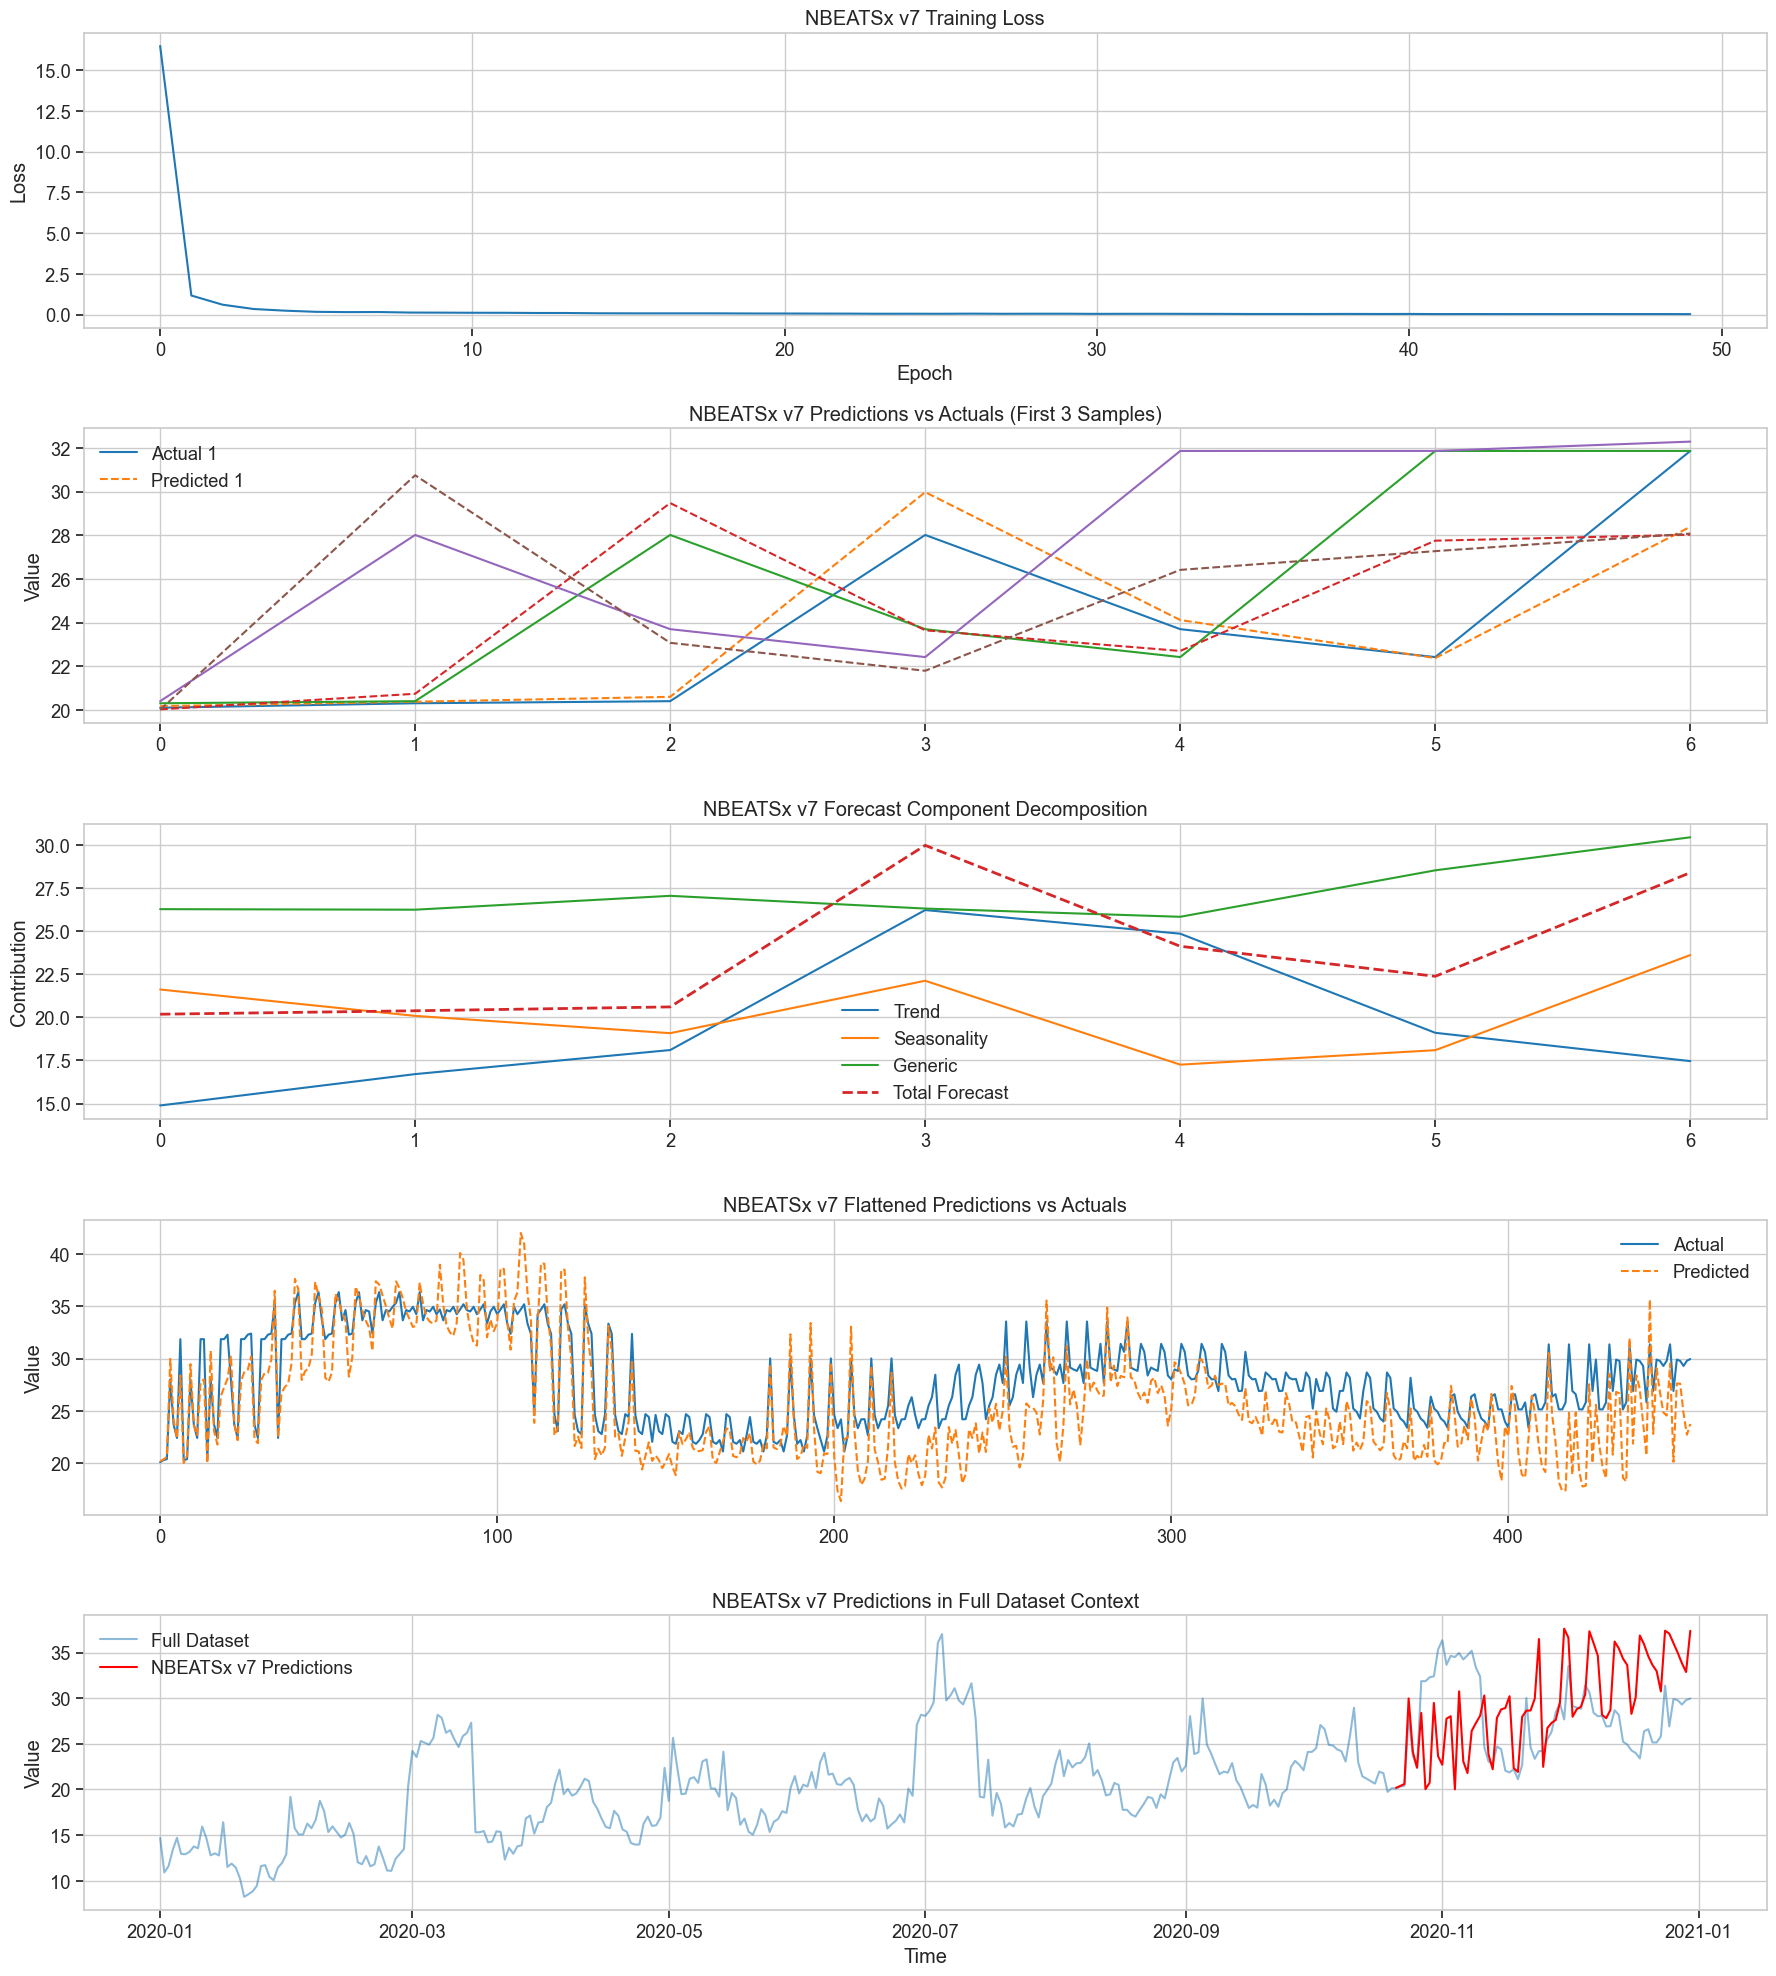


Testing different exogenous modes...

Testing with exog_mode='tcn'...


/opt/anaconda3/envs/finance/lib/python3.13/site-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Epoch [1/10], Loss: 208.1271
Epoch [2/10], Loss: 20.5628
Epoch [3/10], Loss: 5.0263
Epoch [4/10], Loss: 1.6339
Epoch [5/10], Loss: 1.0388
Epoch [6/10], Loss: 0.8211
Epoch [7/10], Loss: 0.5872
Epoch [8/10], Loss: 0.6745
Epoch [9/10], Loss: 0.5007
Epoch [10/10], Loss: 0.4440

Testing with exog_mode='wavenet'...
Epoch [1/10], Loss: 0.3180
Epoch [2/10], Loss: 0.1228
Epoch [3/10], Loss: 0.0673
Epoch [4/10], Loss: 0.0372
Epoch [5/10], Loss: 0.0233
Epoch [6/10], Loss: 0.0156
Epoch [7/10], Loss: 0.0118
Epoch [8/10], Loss: 0.0109
Epoch [9/10], Loss: 0.0092
Epoch [10/10], Loss: 0.0178

Testing with exog_mode='interpretable'...
Epoch [1/10], Loss: 0.2787
Epoch [2/10], Loss: 0.0706
Epoch [3/10], Loss: 0.0456
Epoch [4/10], Loss: 0.0297
Epoch [5/10], Loss: 0.0265
Epoch [6/10], Loss: 0.0218
Epoch [7/10], Loss: 0.0195
Epoch [8/10], Loss: 0.0175
Epoch [9/10], Loss: 0.0168
Epoch [10/10], Loss: 0.0146

Exogenous Mode Comparison:
Mode: tcn
  Final training loss: 0.4440
  Test MSE: 0.7991
  Training time: 

In [6]:
# Import necessary libraries for training
import torch.optim as optim
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import time
import matplotlib.pyplot as plt
from models.nbeatsx_v7 import NBEATSx

# Parameters - match LSTM test parameters for fair comparison
nbeatsx_lookback = 30  # Use 30 days of history
nbeatsx_forecast_horizon = 7  # Predict 7 days ahead
nbeatsx_test_ratio = 0.2

# Prepare data for NBEATSx
print("Preparing data for NBEATSx model...")

# Separate target and exogenous variables
target_col = 'value'
exog_cols = ['temperature', 'is_weekend', 'is_holiday', 'is_promotion',
             'day_of_week_sin', 'day_of_week_cos', 'day_of_month_sin', 
             'day_of_month_cos', 'month_sin', 'month_cos']

# Scale target variable
nbeatsx_scaler_y = StandardScaler()
nbeatsx_y_scaled = nbeatsx_scaler_y.fit_transform(df[[target_col]].values)

# Scale exogenous variables
nbeatsx_scaler_x = StandardScaler()
nbeatsx_exog_scaled = nbeatsx_scaler_x.fit_transform(df[exog_cols].values)

# Create sequences with time-varying exogenous variables
def create_nbeatsx_sequences(data, exog_data, lookback, horizon):
    X, y = [], []
    exog = []
    
    for i in range(len(data) - lookback - horizon + 1):
        # Input sequence
        X.append(data[i:i+lookback, 0])
        
        # Target sequence
        y.append(data[i+lookback:i+lookback+horizon, 0])
        
        # Exogenous variables for both input and forecast periods
        exog.append(exog_data[i:i+lookback+horizon])
    
    return np.array(X), np.array(y), np.array(exog)

# Create sequences
nbeatsx_X, nbeatsx_y, nbeatsx_exog = create_nbeatsx_sequences(
    nbeatsx_y_scaled, nbeatsx_exog_scaled, nbeatsx_lookback, nbeatsx_forecast_horizon)

print(f"Input shape: {nbeatsx_X.shape}")
print(f"Target shape: {nbeatsx_y.shape}")
print(f"Exogenous shape: {nbeatsx_exog.shape}")

# Split into train and test sets
nbeatsx_test_size = int(len(nbeatsx_X) * nbeatsx_test_ratio)
nbeatsx_train_size = len(nbeatsx_X) - nbeatsx_test_size

nbeatsx_X_train = nbeatsx_X[:nbeatsx_train_size]
nbeatsx_y_train = nbeatsx_y[:nbeatsx_train_size]
nbeatsx_exog_train = nbeatsx_exog[:nbeatsx_train_size]

nbeatsx_X_test = nbeatsx_X[nbeatsx_train_size:]
nbeatsx_y_test = nbeatsx_y[nbeatsx_train_size:]
nbeatsx_exog_test = nbeatsx_exog[nbeatsx_train_size:]

# Convert to PyTorch tensors
nbeatsx_X_train_tensor = torch.FloatTensor(nbeatsx_X_train)
nbeatsx_y_train_tensor = torch.FloatTensor(nbeatsx_y_train)
nbeatsx_exog_train_tensor = torch.FloatTensor(nbeatsx_exog_train)

nbeatsx_X_test_tensor = torch.FloatTensor(nbeatsx_X_test)
nbeatsx_y_test_tensor = torch.FloatTensor(nbeatsx_y_test)
nbeatsx_exog_test_tensor = torch.FloatTensor(nbeatsx_exog_test)

# Create data loaders
batch_size = 32
nbeatsx_train_dataset = TensorDataset(nbeatsx_X_train_tensor, nbeatsx_y_train_tensor, nbeatsx_exog_train_tensor)
nbeatsx_test_dataset = TensorDataset(nbeatsx_X_test_tensor, nbeatsx_y_test_tensor, nbeatsx_exog_test_tensor)

nbeatsx_train_loader = DataLoader(nbeatsx_train_dataset, batch_size=batch_size, shuffle=True)
nbeatsx_test_loader = DataLoader(nbeatsx_test_dataset, batch_size=batch_size, shuffle=False)

print(f"Data prepared: {nbeatsx_train_size} training samples, {nbeatsx_test_size} test samples")

# Initialize the NBEATSx model
exog_channels = nbeatsx_exog.shape[2]  # Number of exogenous features

# Initialize the enhanced NBEATSx v5 model
nbeatsx_model = NBEATSx(
    input_size=nbeatsx_lookback,
    forecast_size=nbeatsx_forecast_horizon,
    exog_channels=exog_channels,
    stack_types=['trend', 'seasonality', 'generic'],
    num_blocks_per_stack=[2, 2, 1],
    hidden_units=128,
    layers=3,
    basis_kwargs={
        'degree': 3,
        'harmonics': 5,
        'tcn_levels': 3,
        'tcn_kernel_size': 3
    },
    dropout=0.1,
    exog_mode='tcn'  # Try 'wavenet' or 'interpretable' too
)

# Loss function and optimizer
nbeatsx_criterion = nn.MSELoss()
nbeatsx_optimizer = optim.Adam(nbeatsx_model.parameters(), lr=0.001)

# Training
num_epochs = 50
nbeatsx_train_losses = []
nbeatsx_start_time = time.time()

print("Starting training...")
for epoch in range(num_epochs):
    nbeatsx_model.train()
    nbeatsx_running_loss = 0.0
    
    for inputs, targets, exog in nbeatsx_train_loader:
        # Forward pass
        nbeatsx_outputs = nbeatsx_model(inputs, exog)
        nbeatsx_loss = nbeatsx_criterion(nbeatsx_outputs, targets)
        
        # Backward and optimize
        nbeatsx_optimizer.zero_grad()
        nbeatsx_loss.backward()
        nbeatsx_optimizer.step()
        
        nbeatsx_running_loss += nbeatsx_loss.item()
    
    nbeatsx_avg_loss = nbeatsx_running_loss / len(nbeatsx_train_loader)
    nbeatsx_train_losses.append(nbeatsx_avg_loss)
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {nbeatsx_avg_loss:.4f}')

nbeatsx_training_time = time.time() - nbeatsx_start_time
print(f"Training completed in {nbeatsx_training_time:.2f} seconds")

# Evaluation with component decomposition
nbeatsx_model.eval()
nbeatsx_predictions = []
nbeatsx_actuals = []
nbeatsx_components = []
nbeatsx_inference_start = time.time()

with torch.no_grad():
    for inputs, targets, exog in nbeatsx_test_loader:
        # Get prediction with component decomposition
        outputs, components = nbeatsx_model(inputs, exog, return_decomposition=True)
        
        # Store predictions
        nbeatsx_predictions.append(outputs.numpy())
        nbeatsx_actuals.append(targets.numpy())
        
        # Store components for the first batch only (for visualization)
        if len(nbeatsx_components) == 0:
            nbeatsx_components = [comp.numpy() for comp in components]

nbeatsx_inference_time = time.time() - nbeatsx_inference_start

# Concatenate batches
nbeatsx_predictions = np.concatenate(nbeatsx_predictions)
nbeatsx_actuals = np.concatenate(nbeatsx_actuals)

# Inverse transform to original scale
nbeatsx_predictions_orig = nbeatsx_scaler_y.inverse_transform(nbeatsx_predictions.reshape(-1, 1)).reshape(nbeatsx_predictions.shape)
nbeatsx_actuals_orig = nbeatsx_scaler_y.inverse_transform(nbeatsx_actuals.reshape(-1, 1)).reshape(nbeatsx_actuals.shape)

# For the first sample, inverse transform components for visualization
nbeatsx_components_orig = []
for comp in nbeatsx_components:
    # Take just the first sample
    comp_sample = comp[0].reshape(-1, 1)
    # Inverse transform
    comp_orig = nbeatsx_scaler_y.inverse_transform(comp_sample).flatten()
    nbeatsx_components_orig.append(comp_orig)

# Calculate metrics
nbeatsx_mse = mean_squared_error(nbeatsx_actuals_orig.reshape(-1), nbeatsx_predictions_orig.reshape(-1))
nbeatsx_rmse = np.sqrt(nbeatsx_mse)
nbeatsx_mae = mean_absolute_error(nbeatsx_actuals_orig.reshape(-1), nbeatsx_predictions_orig.reshape(-1))

print(f"\nNBEATSx Performance Metrics:")
print(f"Test MSE: {nbeatsx_mse:.4f}")
print(f"Test RMSE: {nbeatsx_rmse:.4f}")
print(f"Test MAE: {nbeatsx_mae:.4f}")
print(f"Training time: {nbeatsx_training_time:.2f} seconds")
print(f"Inference time: {nbeatsx_inference_time:.4f} seconds")

# Calculate prediction dates
start_idx = nbeatsx_lookback + nbeatsx_train_size
end_idx = min(start_idx + len(nbeatsx_predictions_orig.reshape(-1)), len(df.index))
nbeatsx_pred_dates = df.index[start_idx:end_idx]

# Plot training loss, predictions, component decomposition, and full context for NBEATSx v7
plt.figure(figsize=(18, 20))  # Increased overall height for better visibility

# 1. Plot training loss over epochs
plt.subplot(5, 1, 1)
plt.plot(nbeatsx_train_losses, label='Training Loss')
plt.title('NBEATSx v7 Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# 2. Plot predictions vs actuals (first 3 samples)
plt.subplot(5, 1, 2)
for i in range(min(3, len(nbeatsx_actuals_orig))):
    plt.plot(nbeatsx_actuals_orig[i], label=f'Actual {i+1}' if i == 0 else "")
    plt.plot(nbeatsx_predictions_orig[i], label=f'Predicted {i+1}' if i == 0 else "", linestyle='--')
plt.title('NBEATSx v7 Predictions vs Actuals (First 3 Samples)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# 3. Plot component-wise decomposition for first sample
plt.subplot(5, 1, 3)
component_labels = ['Trend', 'Seasonality', 'Generic']
for i, comp in enumerate(nbeatsx_components_orig):
    plt.plot(comp, label=component_labels[i])
plt.plot(nbeatsx_predictions_orig[0], label='Total Forecast', linestyle='--', linewidth=2)
plt.title('NBEATSx v7 Forecast Component Decomposition')
plt.ylabel('Contribution')
plt.legend()
plt.grid(True)

# 4. Plot flattened actuals vs predictions across entire set
plt.subplot(5, 1, 4)
actuals_flat = nbeatsx_actuals_orig.reshape(-1)
predictions_flat = nbeatsx_predictions_orig.reshape(-1)
plt.plot(actuals_flat, label='Actual')
plt.plot(predictions_flat, label='Predicted', linestyle='--')
plt.title('NBEATSx v7 Flattened Predictions vs Actuals')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# 5. Plot predictions in context of the original full dataset
plt.subplot(5, 1, 5)
plt.plot(df.index, df['value'], label='Full Dataset', alpha=0.5)
nbeatsx_pred_dates = df.index[nbeatsx_lookback + nbeatsx_train_size:nbeatsx_lookback + nbeatsx_train_size + len(predictions_flat)]
pred_to_plot = predictions_flat[:len(nbeatsx_pred_dates)]  # Avoid index overrun
plt.plot(nbeatsx_pred_dates, pred_to_plot, label='NBEATSx v7 Predictions', color='red')
plt.title('NBEATSx v7 Predictions in Full Dataset Context')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Try different exogenous handling modes
print("\nTesting different exogenous modes...")
exog_modes = ['tcn', 'wavenet', 'interpretable']
mode_results = {}

for mode in exog_modes:
    print(f"\nTesting with exog_mode='{mode}'...")
    
    # Initialize model with current mode
    test_model = NBEATSx(
        input_size=nbeatsx_lookback,
        forecast_size=nbeatsx_forecast_horizon,
        exog_channels=exog_channels,
        stack_types=['trend', 'seasonality', 'generic'],
        num_blocks_per_stack=[2, 2, 1],
        hidden_units=128,
        layers=3,
        basis_kwargs={
            'degree': 3,
            'harmonics': 5
        },
        dropout=0.1,
        exog_mode=mode
    )
    
    # Train for just 10 epochs to compare
    test_optimizer = optim.Adam(test_model.parameters(), lr=0.001)
    test_losses = []
    test_start_time = time.time()
    
    for epoch in range(10):
        test_model.train()
        running_loss = 0.0
        
        for inputs, targets, exog in nbeatsx_train_loader:
            outputs = test_model(inputs, exog)
            loss = nbeatsx_criterion(outputs, targets)
            
            test_optimizer.zero_grad()
            loss.backward()
            test_optimizer.step()
            
            running_loss += loss.item()
        
        avg_loss = running_loss / len(nbeatsx_train_loader)
        test_losses.append(avg_loss)
        print(f'Epoch [{epoch+1}/10], Loss: {avg_loss:.4f}')
    
    training_time = time.time() - test_start_time
    
    # Quick evaluation
    test_model.eval()
    with torch.no_grad():
        test_mse = 0
        for inputs, targets, exog in nbeatsx_test_loader:
            outputs = test_model(inputs, exog)
            loss = nbeatsx_criterion(outputs, targets)
            test_mse += loss.item()
    
    test_mse /= len(nbeatsx_test_loader)
    
    # Store results
    mode_results[mode] = {
        'final_loss': test_losses[-1],
        'test_mse': test_mse,
        'training_time': training_time
    }

# Compare exogenous modes
print("\nExogenous Mode Comparison:")
for mode, results in mode_results.items():
    print(f"Mode: {mode}")
    print(f"  Final training loss: {results['final_loss']:.4f}")
    print(f"  Test MSE: {results['test_mse']:.4f}")
    print(f"  Training time: {results['training_time']:.2f} seconds")

# Store results for comparison with LSTM
nbeatsx_results = {
    'model': 'NBEATSx v5',
    'mse': nbeatsx_mse,
    'rmse': nbeatsx_rmse,
    'mae': nbeatsx_mae,
    'training_time': nbeatsx_training_time,
    'inference_time': nbeatsx_inference_time,
    'predictions': nbeatsx_predictions_orig,
    'actuals': nbeatsx_actuals_orig,
    'components': {
        'trend': nbeatsx_components_orig[0] if len(nbeatsx_components_orig) > 0 else None,
        'seasonality': nbeatsx_components_orig[1] if len(nbeatsx_components_orig) > 1 else None,
        'generic': nbeatsx_components_orig[2] if len(nbeatsx_components_orig) > 2 else None
    },
    'exog_modes': mode_results
}

# Create a comparison with LSTM results (assuming lstm_results exists)
try:
    comparison_df = pd.DataFrame({
        'Model': ['LSTM', 'NBEATSx v5'],
        'MSE': [lstm_results['mse'], nbeatsx_results['mse']],
        'RMSE': [lstm_results['rmse'], nbeatsx_results['rmse']],
        'MAE': [lstm_results['mae'], nbeatsx_results['mae']],
        'Training Time (s)': [lstm_results['training_time'], nbeatsx_results['training_time']],
        'Inference Time (s)': [lstm_results['inference_time'], nbeatsx_results['inference_time']]
    })
    print("\nModel Comparison:")
    print(comparison_df)
except NameError:
    print("\nNo LSTM results found for comparison.")

Preparing data for NBEATSx model...
Input shape: (335, 30)
Target shape: (335,)
Exogenous shape: (335, 31, 10)
Data prepared: 268 training samples, 67 test samples
Starting training...


/opt/anaconda3/envs/finance/lib/python3.13/site-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Epoch [5/50], Loss: 1.0523
Epoch [10/50], Loss: 0.3485
Epoch [15/50], Loss: 0.3237
Epoch [20/50], Loss: 0.1938
Epoch [25/50], Loss: 0.1402
Epoch [30/50], Loss: 0.1469
Epoch [35/50], Loss: 0.1943
Epoch [40/50], Loss: 0.1207
Epoch [45/50], Loss: 0.1206
Epoch [50/50], Loss: 0.0863
Training completed in 104.43 seconds

NBEATSx Performance Metrics:
Test MSE: 29.3344
Test RMSE: 5.4161
Test MAE: 4.5444
Training time: 104.43 seconds
Inference time: 0.6836 seconds


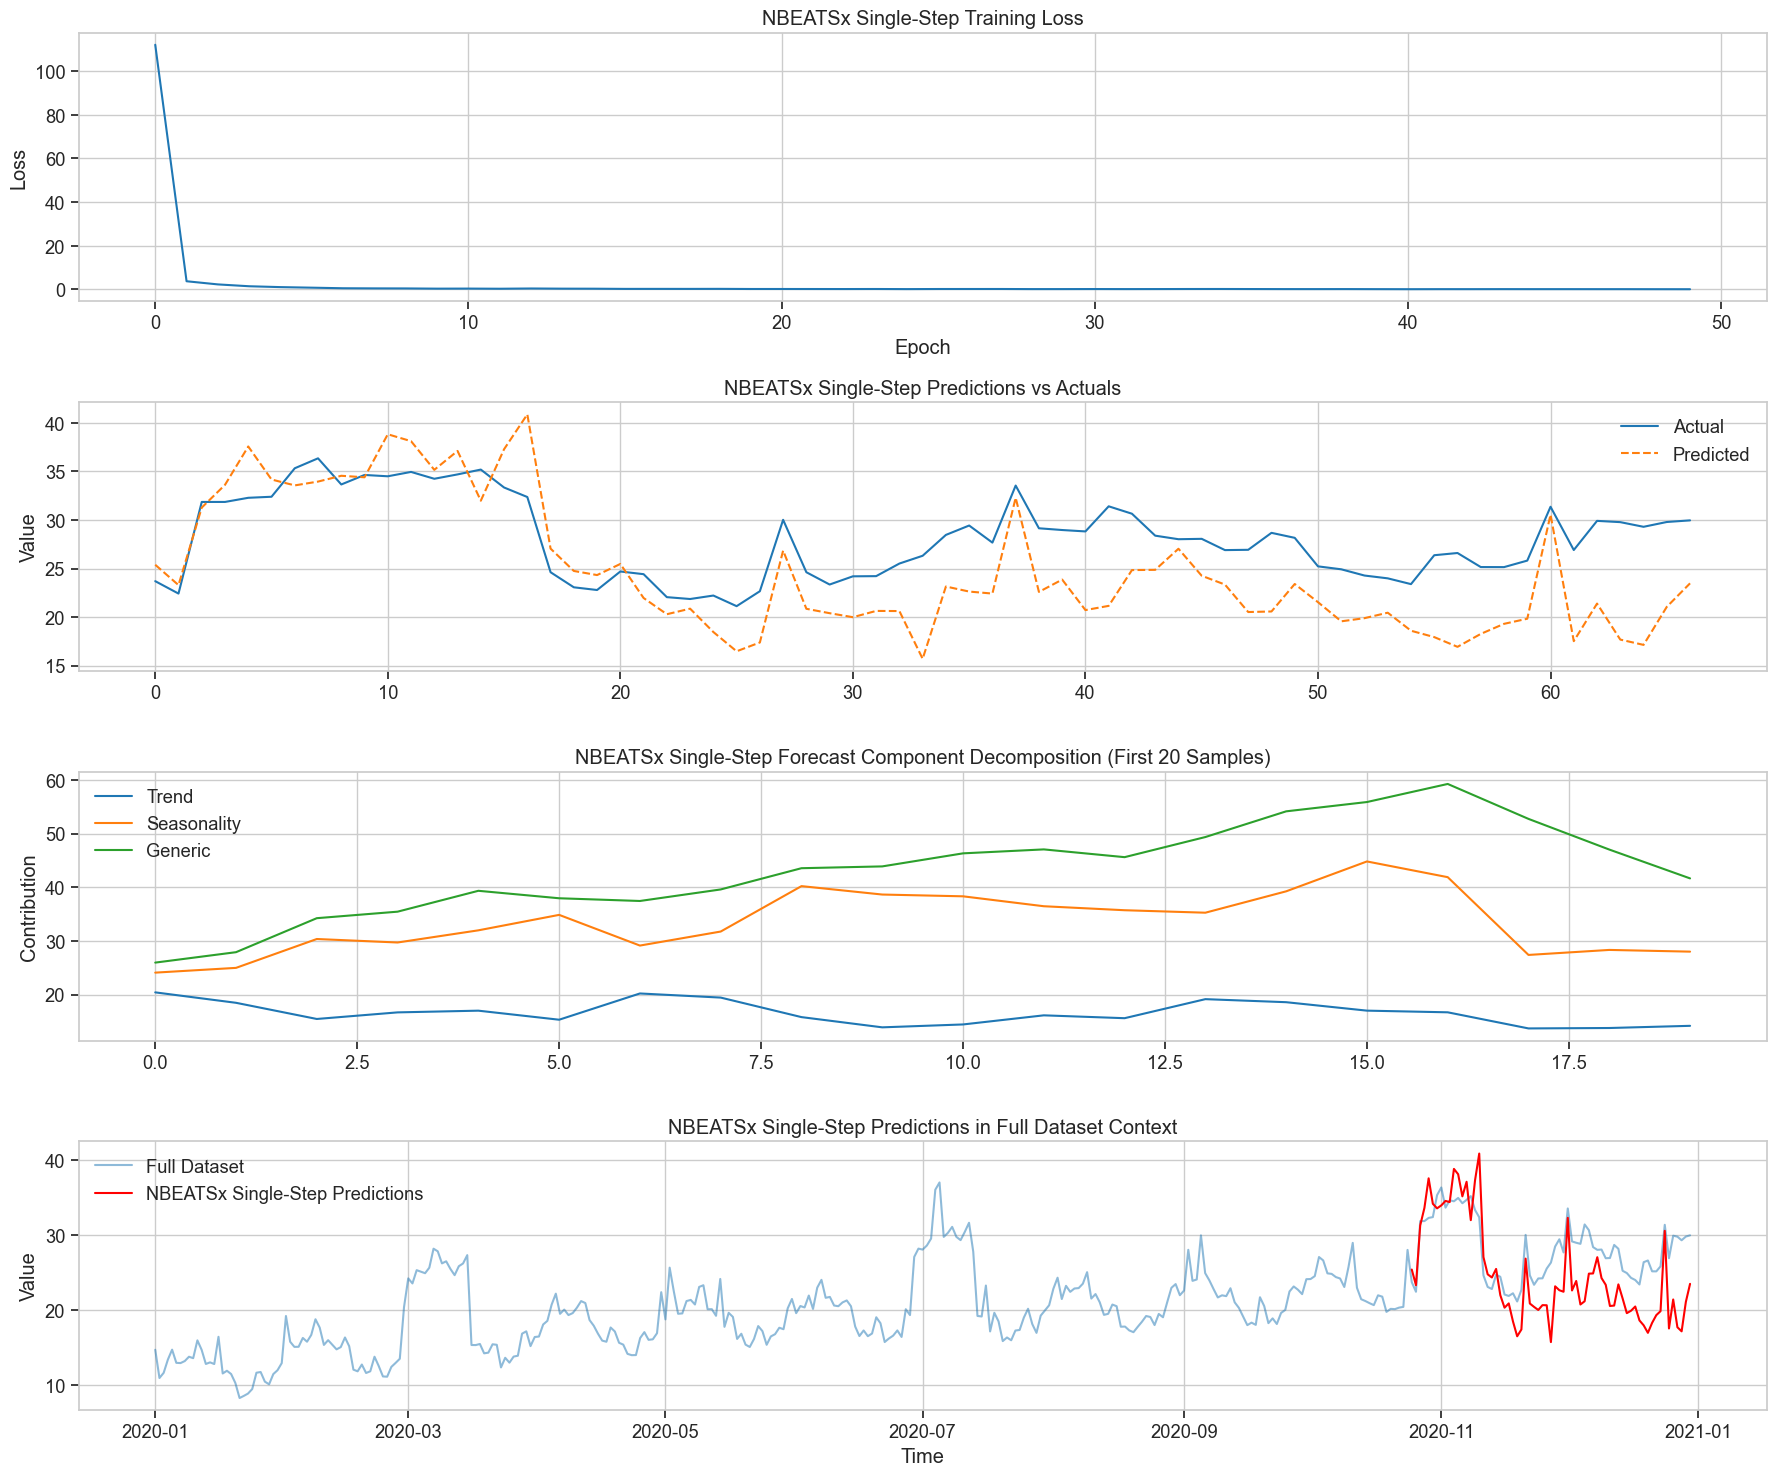


Model Comparison:
                 Model        MSE      RMSE       MAE  Training Time (s)  \
0                 LSTM  18.110609  4.255656  3.700891           4.625718   
1  NBEATSx Single-Step  29.334412  5.416125  4.544401         104.428068   

   Inference Time (s)  
0            0.011621  
1            0.683620  


In [8]:
# Import necessary libraries for training
import torch.optim as optim
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import time
import matplotlib.pyplot as plt
from models.nbeatsx_v7 import NBEATSx

# Parameters - modified for single-step forecasting
nbeatsx_lookback = 30  # Use 30 days of history
nbeatsx_forecast_horizon = 1  # Single-step: predict only 1 day ahead instead of 7
nbeatsx_test_ratio = 0.2

# Prepare data for NBEATSx
print("Preparing data for NBEATSx model...")

# Separate target and exogenous variables
target_col = 'value'
exog_cols = ['temperature', 'is_weekend', 'is_holiday', 'is_promotion',
             'day_of_week_sin', 'day_of_week_cos', 'day_of_month_sin', 
             'day_of_month_cos', 'month_sin', 'month_cos']

# Scale target variable
nbeatsx_scaler_y = StandardScaler()
nbeatsx_y_scaled = nbeatsx_scaler_y.fit_transform(df[[target_col]].values)

# Scale exogenous variables
nbeatsx_scaler_x = StandardScaler()
nbeatsx_exog_scaled = nbeatsx_scaler_x.fit_transform(df[exog_cols].values)

# Modified to create sequences for single-step forecasting
def create_nbeatsx_sequences(data, exog_data, lookback, horizon=1):
    X, y = [], []
    exog = []
    
    for i in range(len(data) - lookback - horizon + 1):
        # Input sequence
        X.append(data[i:i+lookback, 0])
        
        # Target is now a single value
        y.append(data[i+lookback, 0])
        
        # Exogenous variables for input and just one step ahead
        exog.append(exog_data[i:i+lookback+1])
    
    return np.array(X), np.array(y), np.array(exog)

# Create sequences
nbeatsx_X, nbeatsx_y, nbeatsx_exog = create_nbeatsx_sequences(
    nbeatsx_y_scaled, nbeatsx_exog_scaled, nbeatsx_lookback, nbeatsx_forecast_horizon)

print(f"Input shape: {nbeatsx_X.shape}")
print(f"Target shape: {nbeatsx_y.shape}")
print(f"Exogenous shape: {nbeatsx_exog.shape}")

# Split into train and test sets
nbeatsx_test_size = int(len(nbeatsx_X) * nbeatsx_test_ratio)
nbeatsx_train_size = len(nbeatsx_X) - nbeatsx_test_size

nbeatsx_X_train = nbeatsx_X[:nbeatsx_train_size]
nbeatsx_y_train = nbeatsx_y[:nbeatsx_train_size]
nbeatsx_exog_train = nbeatsx_exog[:nbeatsx_train_size]

nbeatsx_X_test = nbeatsx_X[nbeatsx_train_size:]
nbeatsx_y_test = nbeatsx_y[nbeatsx_train_size:]
nbeatsx_exog_test = nbeatsx_exog[nbeatsx_train_size:]

# Convert to PyTorch tensors
nbeatsx_X_train_tensor = torch.FloatTensor(nbeatsx_X_train)
nbeatsx_y_train_tensor = torch.FloatTensor(nbeatsx_y_train)
nbeatsx_exog_train_tensor = torch.FloatTensor(nbeatsx_exog_train)

nbeatsx_X_test_tensor = torch.FloatTensor(nbeatsx_X_test)
nbeatsx_y_test_tensor = torch.FloatTensor(nbeatsx_y_test)
nbeatsx_exog_test_tensor = torch.FloatTensor(nbeatsx_exog_test)

# Create data loaders
batch_size = 32
nbeatsx_train_dataset = TensorDataset(nbeatsx_X_train_tensor, nbeatsx_y_train_tensor, nbeatsx_exog_train_tensor)
nbeatsx_test_dataset = TensorDataset(nbeatsx_X_test_tensor, nbeatsx_y_test_tensor, nbeatsx_exog_test_tensor)

nbeatsx_train_loader = DataLoader(nbeatsx_train_dataset, batch_size=batch_size, shuffle=True)
nbeatsx_test_loader = DataLoader(nbeatsx_test_dataset, batch_size=batch_size, shuffle=False)

print(f"Data prepared: {nbeatsx_train_size} training samples, {nbeatsx_test_size} test samples")

# Initialize the NBEATSx model - modified for single-step forecasting
exog_channels = nbeatsx_exog.shape[2]  # Number of exogenous features

# Initialize the enhanced NBEATSx model with forecast_size=1
nbeatsx_model = NBEATSx(
    input_size=nbeatsx_lookback,
    forecast_size=nbeatsx_forecast_horizon,  # Now set to 1
    exog_channels=exog_channels,
    stack_types=['trend', 'seasonality', 'generic'],
    num_blocks_per_stack=[2, 2, 1],
    hidden_units=128,
    layers=3,
    basis_kwargs={
        'degree': 3,
        'harmonics': 5,
        'tcn_levels': 3,
        'tcn_kernel_size': 3
    },
    dropout=0.1,
    exog_mode='tcn'
)

# Loss function and optimizer
nbeatsx_criterion = nn.MSELoss()
nbeatsx_optimizer = optim.Adam(nbeatsx_model.parameters(), lr=0.001)

# Training
num_epochs = 50
nbeatsx_train_losses = []
nbeatsx_start_time = time.time()

print("Starting training...")
for epoch in range(num_epochs):
    nbeatsx_model.train()
    nbeatsx_running_loss = 0.0
    
    for inputs, targets, exog in nbeatsx_train_loader:
        # Forward pass - reshape targets for comparison with single-step outputs
        nbeatsx_outputs = nbeatsx_model(inputs, exog)
        # Reshape outputs to match targets (from [batch_size, 1] to [batch_size])
        nbeatsx_outputs = nbeatsx_outputs.squeeze()
        nbeatsx_loss = nbeatsx_criterion(nbeatsx_outputs, targets)
        
        # Backward and optimize
        nbeatsx_optimizer.zero_grad()
        nbeatsx_loss.backward()
        nbeatsx_optimizer.step()
        
        nbeatsx_running_loss += nbeatsx_loss.item()
    
    nbeatsx_avg_loss = nbeatsx_running_loss / len(nbeatsx_train_loader)
    nbeatsx_train_losses.append(nbeatsx_avg_loss)
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {nbeatsx_avg_loss:.4f}')

nbeatsx_training_time = time.time() - nbeatsx_start_time
print(f"Training completed in {nbeatsx_training_time:.2f} seconds")

# Evaluation with component decomposition
nbeatsx_model.eval()
nbeatsx_predictions = []
nbeatsx_actuals = []
nbeatsx_components = []
nbeatsx_inference_start = time.time()

with torch.no_grad():
    for inputs, targets, exog in nbeatsx_test_loader:
        # Get prediction with component decomposition
        outputs, components = nbeatsx_model(inputs, exog, return_decomposition=True)
        
        # Store predictions - squeeze to convert from [batch_size, 1] to [batch_size]
        nbeatsx_predictions.append(outputs.squeeze().numpy())
        nbeatsx_actuals.append(targets.numpy())
        
        # Store components for the first batch only (for visualization)
        if len(nbeatsx_components) == 0:
            nbeatsx_components = [comp.squeeze().numpy() for comp in components]

nbeatsx_inference_time = time.time() - nbeatsx_inference_start

# Concatenate batches - Fix the concatenation to handle batch structure properly
nbeatsx_predictions = np.concatenate(nbeatsx_predictions)
nbeatsx_actuals = np.concatenate(nbeatsx_actuals)

# Reshape for inverse scaling
nbeatsx_predictions_reshaped = nbeatsx_predictions.reshape(-1, 1)
nbeatsx_actuals_reshaped = nbeatsx_actuals.reshape(-1, 1)

# Inverse transform to original scale
nbeatsx_predictions_orig = nbeatsx_scaler_y.inverse_transform(nbeatsx_predictions_reshaped).flatten()
nbeatsx_actuals_orig = nbeatsx_scaler_y.inverse_transform(nbeatsx_actuals_reshaped).flatten()

# Calculate metrics
nbeatsx_mse = mean_squared_error(nbeatsx_actuals_orig, nbeatsx_predictions_orig)
nbeatsx_rmse = np.sqrt(nbeatsx_mse)
nbeatsx_mae = mean_absolute_error(nbeatsx_actuals_orig, nbeatsx_predictions_orig)

print(f"\nNBEATSx Performance Metrics:")
print(f"Test MSE: {nbeatsx_mse:.4f}")
print(f"Test RMSE: {nbeatsx_rmse:.4f}")
print(f"Test MAE: {nbeatsx_mae:.4f}")
print(f"Training time: {nbeatsx_training_time:.2f} seconds")
print(f"Inference time: {nbeatsx_inference_time:.4f} seconds")

# Calculate prediction dates
start_idx = nbeatsx_lookback + nbeatsx_train_size
end_idx = min(start_idx + len(nbeatsx_predictions_orig), len(df.index))
nbeatsx_pred_dates = df.index[start_idx:end_idx]

# Plot training loss, predictions, and context for NBEATSx single-step
plt.figure(figsize=(18, 15))

# 1. Plot training loss over epochs
plt.subplot(4, 1, 1)
plt.plot(nbeatsx_train_losses, label='Training Loss')
plt.title('NBEATSx Single-Step Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# 2. Plot predictions vs actuals
plt.subplot(4, 1, 2)
plt.plot(nbeatsx_actuals_orig, label='Actual')
plt.plot(nbeatsx_predictions_orig, label='Predicted', linestyle='--')
plt.title('NBEATSx Single-Step Predictions vs Actuals')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# 3. Plot component-wise decomposition for first few samples
plt.subplot(4, 1, 3)
component_labels = ['Trend', 'Seasonality', 'Generic']
for i, comp_label in enumerate(component_labels):
    if i < len(nbeatsx_components):
        # Get the first few components for visualization
        comp_values = nbeatsx_components[i][:20]  # First 20 values
        # Reshape for inverse transform
        comp_reshaped = comp_values.reshape(-1, 1)
        # Inverse transform
        comp_orig = nbeatsx_scaler_y.inverse_transform(comp_reshaped).flatten()
        plt.plot(comp_orig, label=comp_label)

plt.title('NBEATSx Single-Step Forecast Component Decomposition (First 20 Samples)')
plt.ylabel('Contribution')
plt.legend()
plt.grid(True)

# 4. Plot predictions in context of the original full dataset
plt.subplot(4, 1, 4)
plt.plot(df.index, df['value'], label='Full Dataset', alpha=0.5)
nbeatsx_pred_dates = df.index[nbeatsx_lookback + nbeatsx_train_size:nbeatsx_lookback + nbeatsx_train_size + len(nbeatsx_predictions_orig)]
plt.plot(nbeatsx_pred_dates, nbeatsx_predictions_orig, label='NBEATSx Single-Step Predictions', color='red')
plt.title('NBEATSx Single-Step Predictions in Full Dataset Context')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Store results for comparison
nbeatsx_results = {
    'model': 'NBEATSx Single-Step',
    'mse': nbeatsx_mse,
    'rmse': nbeatsx_rmse,
    'mae': nbeatsx_mae,
    'training_time': nbeatsx_training_time,
    'inference_time': nbeatsx_inference_time,
    'predictions': nbeatsx_predictions_orig,
    'actuals': nbeatsx_actuals_orig
}

# Create a comparison with LSTM results (assuming lstm_results exists)
try:
    comparison_df = pd.DataFrame({
        'Model': ['LSTM', 'NBEATSx Single-Step'],
        'MSE': [lstm_results['mse'], nbeatsx_results['mse']],
        'RMSE': [lstm_results['rmse'], nbeatsx_results['rmse']],
        'MAE': [lstm_results['mae'], nbeatsx_results['mae']],
        'Training Time (s)': [lstm_results['training_time'], nbeatsx_results['training_time']],
        'Inference Time (s)': [lstm_results['inference_time'], nbeatsx_results['inference_time']]
    })
    print("\nModel Comparison:")
    print(comparison_df)
except NameError:
    print("\nNo LSTM results found for comparison.")

## DeepAR V3 Test

Starting DeepAR training...
Epoch [1/50], Batch [0/9], Loss: 1.7805
Epoch [2/50], Batch [0/9], Loss: 1.1102
Epoch [3/50], Batch [0/9], Loss: 0.8094
Epoch [4/50], Batch [0/9], Loss: 0.6445
Epoch [5/50], Batch [0/9], Loss: 0.4129
Epoch [5/50], Loss: 0.3041
Epoch [6/50], Batch [0/9], Loss: 0.2240
Epoch [7/50], Batch [0/9], Loss: 0.1179
Epoch [8/50], Batch [0/9], Loss: -0.0786
Epoch [9/50], Batch [0/9], Loss: -0.0588
Epoch [10/50], Batch [0/9], Loss: -0.3462
Epoch [10/50], Loss: -0.2927
Epoch [11/50], Batch [0/9], Loss: -0.3563
Epoch [12/50], Batch [0/9], Loss: -0.2887
Epoch [13/50], Batch [0/9], Loss: -0.5611
Epoch [14/50], Batch [0/9], Loss: -0.5220
Epoch [15/50], Batch [0/9], Loss: -0.6204
Epoch [15/50], Loss: -0.6465
Epoch [16/50], Batch [0/9], Loss: -0.7308
Epoch [17/50], Batch [0/9], Loss: -0.7428
Epoch [18/50], Batch [0/9], Loss: -0.7331
Epoch [19/50], Batch [0/9], Loss: -0.7532
Epoch [20/50], Batch [0/9], Loss: -0.8456
Epoch [20/50], Loss: -0.8495
Epoch [21/50], Batch [0/9], Loss: 

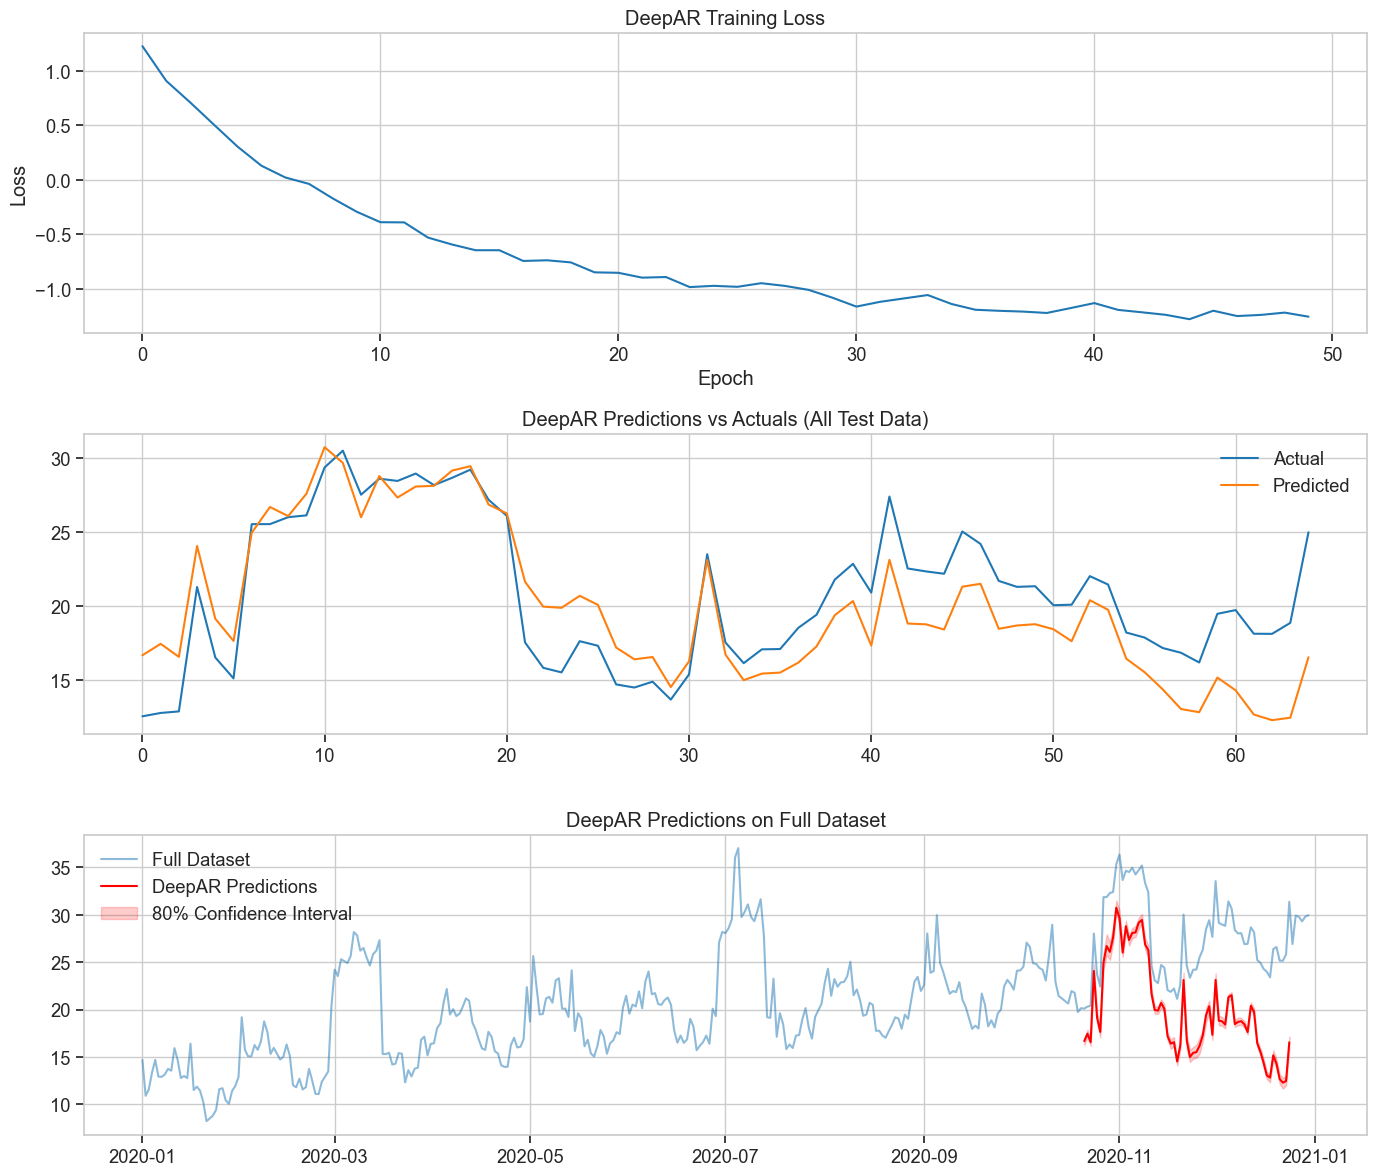


Model Comparison:
    Model        MSE      RMSE       MAE  Training Time (s)  \
0    LSTM  10.898610  3.301304  2.668501           4.028060   
1  DeepAR   9.158065  3.026229  2.508919           8.815884   

   Inference Time (s)  
0            0.009498  
1            2.665696  


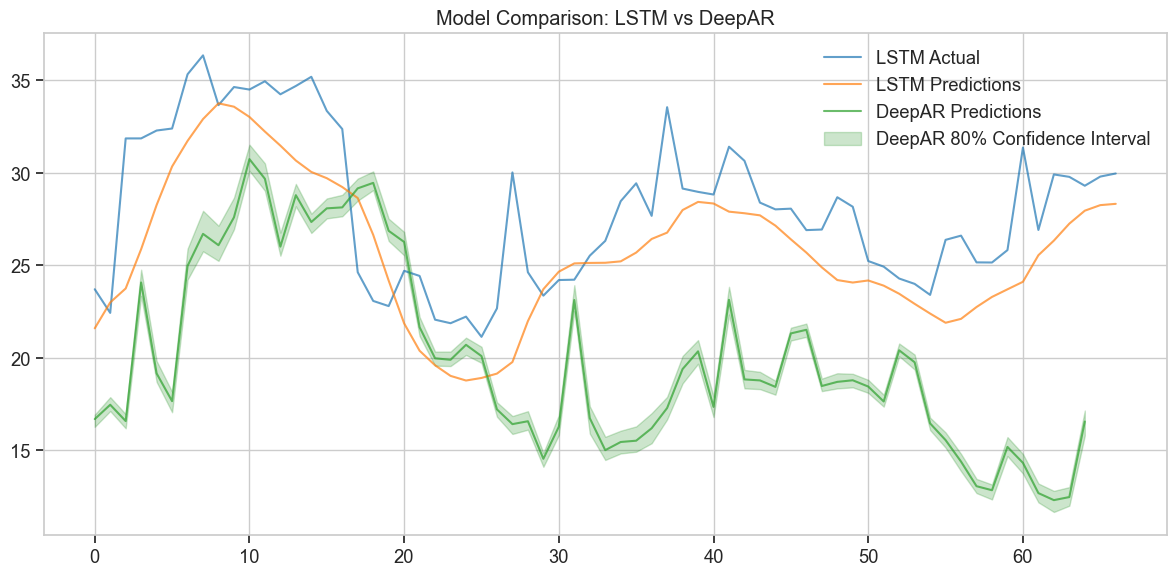

In [ ]:
# Fix the dimensions mismatch issue in the plotting code
# Test DeepAR model on synthetic data with proper None handling
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Import the DeepAR model
from models.deepar_v3 import DeepARModel

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define a custom collate function to handle None values
def custom_collate(batch):
    elem = batch[0]
    result = {}
    
    for key in elem:
        if all(batch[i][key] is not None for i in range(len(batch))):
            result[key] = torch.stack([batch[i][key] for i in range(len(batch))])
        else:
            # If this field contains None, don't include it in the result
            result[key] = None
            
    return result

# Custom dataset for DeepAR
class TimeSeriesDataset(Dataset):
    def __init__(self, df, seq_length, pred_length, target_col='value', time_cols=None):
        self.seq_length = seq_length
        self.pred_length = pred_length
        self.target_col = target_col
        
        # Scale the target variable
        self.target_scaler = StandardScaler()
        target_data = df[target_col].values.reshape(-1, 1)
        self.scaled_target = self.target_scaler.fit_transform(target_data)
        
        # Process time features if provided
        if time_cols:
            time_features = df[time_cols].values
            # Scale time features
            self.time_scaler = StandardScaler()
            self.scaled_time_features = self.time_scaler.fit_transform(time_features)
            self.num_time_features = len(time_cols)
        else:
            self.scaled_time_features = None
            self.num_time_features = 0
        
        # Store indices for slicing
        total_length = len(df)
        self.indices = []
        for i in range(total_length - seq_length - pred_length + 1):
            self.indices.append((i, i + seq_length + pred_length))
    
    def __len__(self):
        return len(self.indices)
    
    def __getitem__(self, idx):
        start_idx, end_idx = self.indices[idx]
        
        # Get target sequence
        target_seq = self.scaled_target[start_idx:end_idx].squeeze()
        
        # Get time features if available
        if self.scaled_time_features is not None:
            time_feat_seq = self.scaled_time_features[start_idx:end_idx]
            time_feat_tensor = torch.FloatTensor(time_feat_seq)
        else:
            time_feat_tensor = None
        
        # No static features in this dataset
        static_feat_tensor = None
        
        return {
            'y': torch.FloatTensor(target_seq),
            'time_features': time_feat_tensor,
            'static_features': None  # Explicitly set to None since we don't have static features
        }

# Parameters
sequence_length = 30  # Same as LSTM model for fair comparison
pred_length = 7       # Predict 7 days ahead
test_ratio = 0.2      # 20% test split

# Define which columns to use as time features
time_feature_cols = [
    'temperature', 'day_of_week_sin', 'day_of_week_cos', 
    'day_of_month_sin', 'day_of_month_cos', 'month_sin', 'month_cos',
    'is_weekend', 'is_holiday', 'is_promotion'
]

# Calculate split indices
total_size = len(df) - sequence_length - pred_length + 1
test_size = int(total_size * test_ratio)
train_size = total_size - test_size

# Create train and test dataframes with proper indexing
train_end_idx = train_size + sequence_length + pred_length - 1
train_df = df.iloc[:train_end_idx+1]  # Include one extra point to ensure proper sequence generation

# Modified: Use all test data 
test_df = df.iloc[train_size:]

# Create datasets
train_dataset = TimeSeriesDataset(train_df, sequence_length, pred_length, 
                               target_col='value', 
                               time_cols=time_feature_cols)

test_dataset = TimeSeriesDataset(test_df, sequence_length, pred_length, 
                             target_col='value', 
                             time_cols=time_feature_cols)

# Create data loaders with custom collate function
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate)
# Modified: Use a smaller batch size for test to handle all instances
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn=custom_collate)

# Initialize DeepAR model
model_config = {
    'num_time_features': len(time_feature_cols),
    'num_static_features': 0,  # No static features in this dataset
    'embedding_dim': 32,
    'hidden_size': 64,
    'num_layers': 2,
    'dropout': 0.1,
    'likelihood': 'gaussian',
    'seq_len': sequence_length,
    'prediction_len': pred_length
}

# Initialize model
deepar_model = DeepARModel(**model_config)

# Setup optimizer
learning_rate = 0.001
optimizer = torch.optim.Adam(deepar_model.parameters(), lr=learning_rate)

# Training
import time
num_epochs = 50
train_losses = []
start_time = time.time()

print("Starting DeepAR training...")
for epoch in range(num_epochs):
    deepar_model.train()
    epoch_loss = 0.0
    batch_count = 0
    
    for batch_idx, batch in enumerate(train_loader):
        y = batch['y']
        time_features = batch['time_features']
        
        # Zero gradients
        optimizer.zero_grad()
        
        # Compute loss
        loss = deepar_model.loss(
            y=y,
            time_features=time_features,
            static_features=None  # No static features
        )
        
        # Backward and optimize
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        batch_count += 1
        
        if batch_idx % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx}/{len(train_loader)}], Loss: {loss.item():.4f}')
    
    if batch_count > 0:
        avg_loss = epoch_loss / batch_count
        train_losses.append(avg_loss)
        
        if (epoch + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

# Evaluation
# Fix the dimensionality issues in the evaluation section
deepar_model.eval()
predictions = []
actuals = []
forecast_samples_list = []
prediction_dates = []  # Store dates for each prediction point
inference_start = time.time()

# Track the current starting date for prediction windows
current_idx = train_size

with torch.no_grad():
    for batch in test_loader:
        y = batch['y']
        time_features = batch['time_features']
        
        # Forward pass - get predictions
        outputs = deepar_model.forward(
            y=y[:, :sequence_length],
            time_features=time_features[:, :sequence_length] if time_features is not None else None,
            static_features=None,
            future_time_features=time_features[:, sequence_length:] if time_features is not None else None,
            training=False
        )
        
        # Get multiple samples for uncertainty estimation
        samples = deepar_model.sample(
            y=y[:, :sequence_length],
            num_samples=100,
            time_features=time_features[:, :sequence_length] if time_features is not None else None,
            static_features=None,
            future_time_features=time_features[:, sequence_length:] if time_features is not None else None
        )
        
        # Store predictions and actuals - handle dimensionality properly
        pred_mean = outputs['mean'].detach().numpy()
        act = y[:, sequence_length:].detach().numpy()
        sam = samples.detach().numpy()
        
        # For each instance in the batch
        for i in range(len(pred_mean)):
            # Store prediction and actual for one-step ahead forecast (like LSTM)
            predictions.append(pred_mean[i, 0])
            actuals.append(act[i, 0])
            
            # Store the date for this prediction
            prediction_date = df.index[current_idx + sequence_length]
            prediction_dates.append(prediction_date)
            
            # Move to next time step
            current_idx += 1
        
        # Also keep the full samples for uncertainty bounds
        forecast_samples_list.append(sam)

inference_time = time.time() - inference_start

# Convert lists to arrays
predictions = np.array(predictions).reshape(-1, 1)
actuals = np.array(actuals).reshape(-1, 1)
prediction_dates = np.array(prediction_dates)

# Reshape arrays properly for inverse transform
scaler = train_dataset.target_scaler

# Inverse transform predictions and actuals
predictions_original = scaler.inverse_transform(predictions)
actuals_original = scaler.inverse_transform(actuals)

# Handle forecast samples for uncertainty bounds
lower_bounds = []
upper_bounds = []

# Process each batch of samples
for samples_batch in forecast_samples_list:
    batch_size = samples_batch.shape[0]
    
    for i in range(batch_size):
        # Get samples for the first prediction step (like LSTM)
        samples = samples_batch[i, 0, :].reshape(-1, 1)
        samples_original = scaler.inverse_transform(samples)
        
        # Calculate quantiles
        lower = np.quantile(samples_original, 0.1)
        upper = np.quantile(samples_original, 0.9)
        
        lower_bounds.append(lower)
        upper_bounds.append(upper)

# Convert to arrays
lower_bounds = np.array(lower_bounds).reshape(-1, 1)
upper_bounds = np.array(upper_bounds).reshape(-1, 1)

# Calculate metrics
mse = mean_squared_error(actuals_original, predictions_original)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actuals_original, predictions_original)

print(f"\nDeepAR Performance Metrics:")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Inference time: {inference_time:.4f} seconds")
print(f"Number of test predictions: {len(predictions_original)}")

# Plot results
plt.figure(figsize=(14, 12))

# Plot 1: Training loss
plt.subplot(3, 1, 1)
plt.plot(train_losses)
plt.title('DeepAR Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot 2: Predictions vs actuals for entire test set
plt.subplot(3, 1, 2)
time_idx = np.arange(len(actuals_original))
plt.plot(time_idx, actuals_original, label='Actual')
plt.plot(time_idx, predictions_original, label='Predicted')
plt.title('DeepAR Predictions vs Actuals (All Test Data)')
plt.legend()

# Plot 3: Predictions in context of the original data
plt.subplot(3, 1, 3)
plt.plot(df.index, df['value'], label='Full Dataset', alpha=0.5)

# Plot all predictions with dates
plt.plot(prediction_dates, predictions_original, label='DeepAR Predictions', color='red')

# Add confidence intervals
plt.fill_between(
    prediction_dates, 
    lower_bounds.flatten(), 
    upper_bounds.flatten(), 
    alpha=0.2, color='red', 
    label='80% Confidence Interval'
)

plt.title('DeepAR Predictions on Full Dataset')
plt.legend()
plt.tight_layout()
plt.show()

# Store results for later comparison
deepar_results = {
    'model': 'DeepAR',
    'mse': mse,
    'rmse': rmse,
    'mae': mae,
    'training_time': training_time,
    'inference_time': inference_time,
    'predictions': predictions_original,
    'actuals': actuals_original,
    'prediction_dates': prediction_dates,
    'lower_bounds': lower_bounds,
    'upper_bounds': upper_bounds
}

# Compare with LSTM results if available
try:
    # Create comparison dataframe
    comparison_df = pd.DataFrame({
        'Model': ['LSTM', 'DeepAR'],
        'MSE': [lstm_results['mse'], deepar_results['mse']],
        'RMSE': [lstm_results['rmse'], deepar_results['rmse']],
        'MAE': [lstm_results['mae'], deepar_results['mae']],
        'Training Time (s)': [lstm_results['training_time'], deepar_results['training_time']],
        'Inference Time (s)': [lstm_results['inference_time'], deepar_results['inference_time']]
    })
    
    print("\nModel Comparison:")
    print(comparison_df)
    
    # Plot comparison of predictions
    plt.figure(figsize=(12, 6))
    
    # Check if prediction dates match
    if len(lstm_results['prediction_dates']) == len(deepar_results['prediction_dates']):
        # Plot both models' predictions
        plt.plot(lstm_results['prediction_dates'], lstm_results['actuals'], label='Actual', alpha=0.7)
        plt.plot(lstm_results['prediction_dates'], lstm_results['predictions'], label='LSTM Predictions', alpha=0.7)
        plt.plot(deepar_results['prediction_dates'], deepar_results['predictions'], label='DeepAR Predictions', alpha=0.7)
        
        # Add DeepAR confidence intervals
        plt.fill_between(
            deepar_results['prediction_dates'], 
            deepar_results['lower_bounds'].flatten(), 
            deepar_results['upper_bounds'].flatten(), 
            alpha=0.2, 
            color='green', 
            label='DeepAR 80% Confidence Interval'
        )
    else:
        # Plot using separate x-axes if dates don't match
        plt.plot(lstm_results['actuals'], label='LSTM Actual', alpha=0.7)
        plt.plot(lstm_results['predictions'], label='LSTM Predictions', alpha=0.7)
        plt.plot(deepar_results['predictions'], label='DeepAR Predictions', alpha=0.7)
        
        # Add DeepAR confidence intervals
        plt.fill_between(
            np.arange(len(deepar_results['predictions'])), 
            deepar_results['lower_bounds'].flatten(), 
            deepar_results['upper_bounds'].flatten(), 
            alpha=0.2, 
            color='green', 
            label='DeepAR 80% Confidence Interval'
        )
    
    plt.title('Model Comparison: LSTM vs DeepAR')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
except NameError:
    print("LSTM results not available for comparison. Only showing DeepAR results.")

## TFT V3 Test


Starting TFT training...
Epoch [5/50], Loss: 0.0273
Epoch [10/50], Loss: 0.0173
Epoch [15/50], Loss: 0.0107
Epoch [20/50], Loss: 0.0060
Epoch [25/50], Loss: 0.0042
Epoch [30/50], Loss: 0.0030
Epoch [35/50], Loss: 0.0029
Epoch [40/50], Loss: 0.0020
Epoch [45/50], Loss: 0.0023
Epoch [50/50], Loss: 0.0024
Training completed in 9.89 seconds

TFT Performance Metrics:
Test MSE: 17.9277
Test RMSE: 4.2341
Test MAE: 3.8326
Inference time: 0.0173 seconds


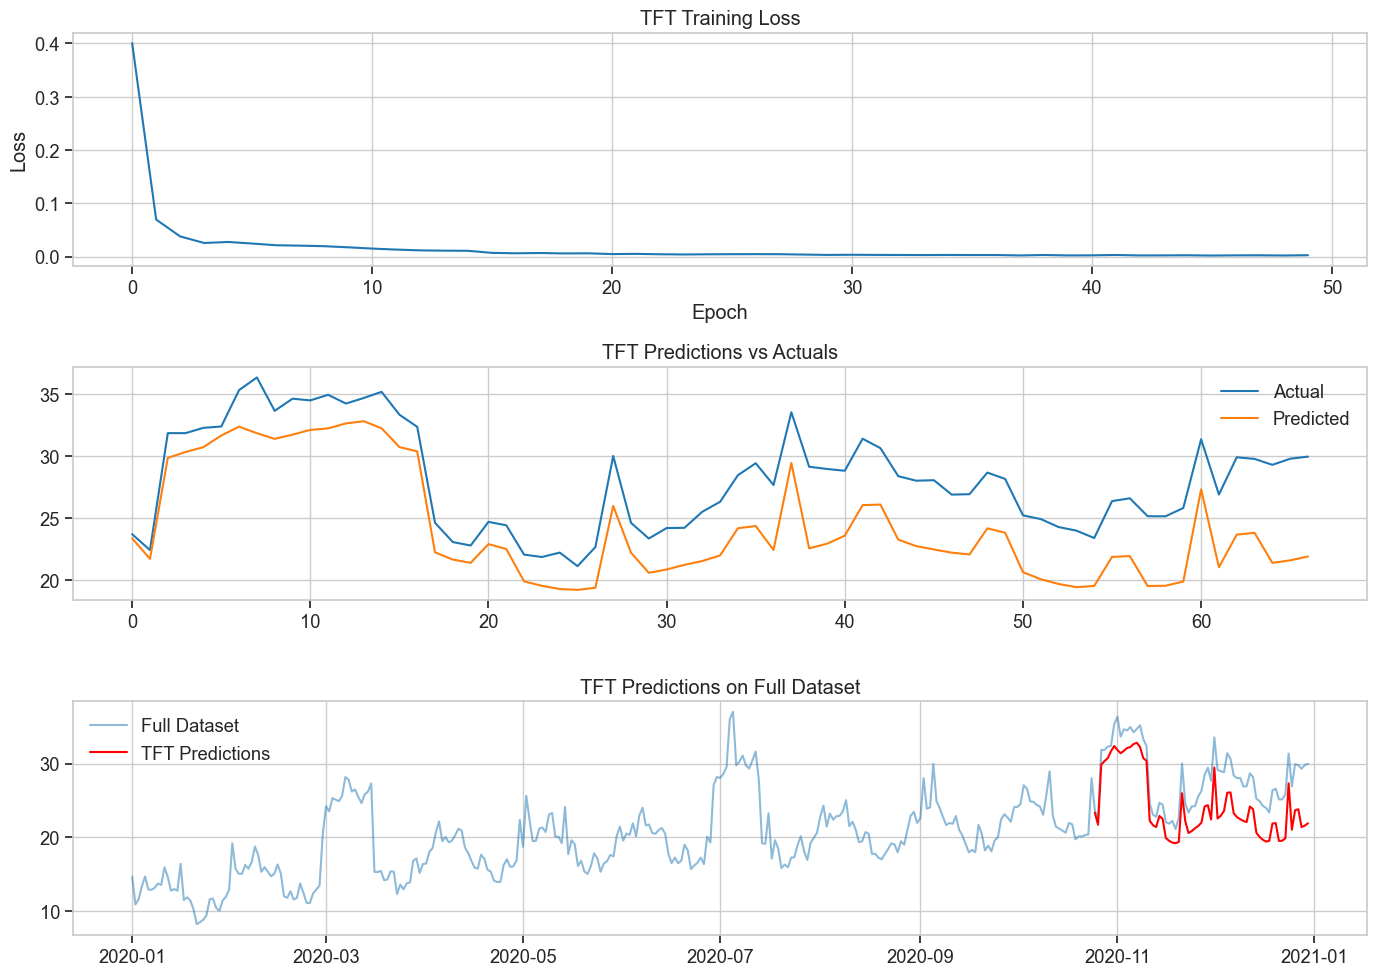


Model Comparison:
  Model        MSE      RMSE       MAE  Training Time (s)  Inference Time (s)
0  LSTM  10.898610  3.301304  2.668501           4.028060            0.009498
1   TFT  17.927704  4.234112  3.832602           9.893258            0.017315


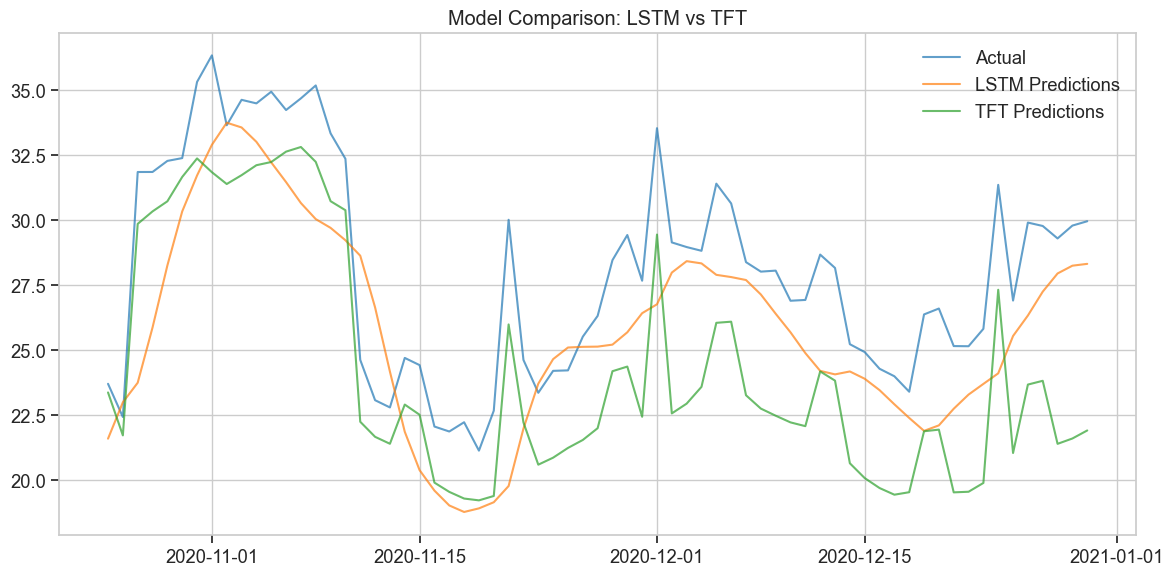

In [ ]:
# Fixed TFT implementation to align with LSTM test code
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time

# Import the TFT model
from models.tft_v3 import TemporalFusionTransformer

# Set random seeds
torch.manual_seed(42)
np.random.seed(42)

# Parameters - match with LSTM
sequence_length = 30  # Historical window
forecast_horizon = 1  # One-step-ahead prediction (like LSTM)
test_ratio = 0.2

# Define features
time_features = [
    'temperature', 'day_of_week_sin', 'day_of_week_cos', 
    'day_of_month_sin', 'day_of_month_cos', 'month_sin', 'month_cos'
]
static_features = ['is_weekend', 'is_holiday', 'is_promotion']

# Scale the data (using MinMaxScaler like in LSTM code)
tft_scaler = MinMaxScaler()
tft_values_scaled = tft_scaler.fit_transform(df[['value']].values)

# Create sequences for TFT (aligned with LSTM approach)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences (same as LSTM)
tft_X, tft_y = create_sequences(tft_values_scaled, sequence_length)

# Split into train and test sets
tft_test_size = int(len(tft_X) * test_ratio)
tft_train_size = len(tft_X) - tft_test_size
tft_X_train, tft_X_test = tft_X[:tft_train_size], tft_X[tft_train_size:]
tft_y_train, tft_y_test = tft_y[:tft_train_size], tft_y[tft_train_size:]

# Get corresponding static and time features
train_indices = list(range(sequence_length, sequence_length + tft_train_size))
test_indices = list(range(sequence_length + tft_train_size, sequence_length + tft_train_size + tft_test_size))

# Extract static and time features for training and testing
train_static = df[static_features].iloc[train_indices].values
test_static = df[static_features].iloc[test_indices].values

# Extract future time features (known at prediction time)
train_time = df[time_features].iloc[train_indices].values
test_time = df[time_features].iloc[test_indices].values

# Convert to PyTorch tensors
tft_X_train_tensor = torch.FloatTensor(tft_X_train)
tft_y_train_tensor = torch.FloatTensor(tft_y_train)
tft_X_test_tensor = torch.FloatTensor(tft_X_test)
tft_y_test_tensor = torch.FloatTensor(tft_y_test)

train_static_tensor = torch.FloatTensor(train_static)
test_static_tensor = torch.FloatTensor(test_static)
train_time_tensor = torch.FloatTensor(train_time)
test_time_tensor = torch.FloatTensor(test_time)

# Create a simple dataset class 
class TFTDataset(torch.utils.data.Dataset):
    def __init__(self, X, y, static_features, time_features):
        self.X = X  # Historical values
        self.y = y  # Target values
        self.static = static_features  # Static features
        self.time = time_features  # Future time features
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return {
            'X': self.X[idx],
            'y': self.y[idx],
            'static': self.static[idx],
            'time': self.time[idx]
        }

# Create datasets
tft_train_dataset = TFTDataset(tft_X_train_tensor, tft_y_train_tensor, train_static_tensor, train_time_tensor)
tft_test_dataset = TFTDataset(tft_X_test_tensor, tft_y_test_tensor, test_static_tensor, test_time_tensor)

# Create data loaders
batch_size = 32
tft_train_loader = torch.utils.data.DataLoader(tft_train_dataset, batch_size=batch_size, shuffle=True)
tft_test_loader = torch.utils.data.DataLoader(tft_test_dataset, batch_size=batch_size, shuffle=False)

# Create TFT-compatible inputs from batches
def prepare_tft_batch(batch):
    # Extract components
    X = batch['X']  # [batch_size, seq_len, 1]
    static = batch['static']  # [batch_size, num_static]
    time = batch['time']  # [batch_size, num_time]
    targets = batch['y']  # [batch_size, 1]
    
    # 1. Prepare encoder inputs (target history only for now)
    encoder_inputs = [X]
    
    # 2. Prepare decoder inputs (future time features)
    decoder_inputs = []
    for i in range(time.shape[1]):
        # Reshape time feature to [batch_size, horizon=1, 1]
        feature = time[:, i:i+1].unsqueeze(1)
        decoder_inputs.append(feature)
    
    # 3. Prepare static inputs
    static_inputs = []
    for i in range(static.shape[1]):
        # Extract each static feature
        feature = static[:, i:i+1]
        static_inputs.append(feature)
    
    return {
        'encoder_inputs': encoder_inputs,
        'decoder_inputs': decoder_inputs,
        'static_inputs': static_inputs,
        'targets': targets
    }

# Initialize TFT model
tft_model = TemporalFusionTransformer(
    static_input_sizes=[1, 1, 1],  # Three static features
    encoder_input_sizes=[1],  # Target history
    decoder_input_sizes=[1] * len(time_features),  # Future time features
    hidden_dim=64,
    lstm_layers=2,
    dropout=0.1,
    num_heads=4,
    forecast_horizon=1,  # One-step ahead like LSTM
    backcast_length=sequence_length,
    output_dim=1,
    quantiles=[0.1, 0.5, 0.9]
)

# Define loss function (similar to LSTM's MSE)
tft_criterion = nn.MSELoss()

def tft_loss(outputs, targets):
    # Use median prediction (50th percentile)
    predictions = outputs[:, 0, 0, 1]  # [batch, horizon=1, output_dim=1, quantile=1(median)]
    return tft_criterion(predictions, targets.squeeze())

# Setup optimizer
tft_optimizer = optim.Adam(tft_model.parameters(), lr=0.001)

# Training loop
num_epochs = 50
tft_train_losses = []
tft_start_time = time.time()

print("Starting TFT training...")
for epoch in range(num_epochs):
    tft_model.train()
    running_loss = 0.0
    
    for batch in tft_train_loader:
        # Prepare batch in TFT format
        tft_batch = prepare_tft_batch(batch)
        
        # Zero gradients
        tft_optimizer.zero_grad()
        
        # Forward pass
        outputs = tft_model(
            static_inputs=tft_batch['static_inputs'],
            encoder_inputs=tft_batch['encoder_inputs'],
            decoder_inputs=tft_batch['decoder_inputs']
        )
        
        # Compute loss
        loss = tft_loss(outputs, tft_batch['targets'])
        
        # Backward and optimize
        loss.backward()
        tft_optimizer.step()
        
        running_loss += loss.item()
    
    avg_loss = running_loss / len(tft_train_loader)
    tft_train_losses.append(avg_loss)
    
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

tft_training_time = time.time() - tft_start_time
print(f"Training completed in {tft_training_time:.2f} seconds")

# Evaluation
tft_model.eval()
tft_predictions = []
tft_actuals = []
tft_inference_start = time.time()

with torch.no_grad():
    for batch in tft_test_loader:
        # Prepare batch in TFT format
        tft_batch = prepare_tft_batch(batch)
        
        # Forward pass
        outputs = tft_model(
            static_inputs=tft_batch['static_inputs'],
            encoder_inputs=tft_batch['encoder_inputs'],
            decoder_inputs=tft_batch['decoder_inputs']
        )
        
        # Get predictions (median)
        predictions = outputs[:, 0, 0, 1].cpu().numpy()  # [batch, 1]
        actuals = tft_batch['targets'].cpu().numpy()
        
        tft_predictions.append(predictions)
        tft_actuals.append(actuals)

tft_inference_time = time.time() - tft_inference_start

# Concatenate batches
tft_predictions = np.concatenate(tft_predictions)
tft_actuals = np.concatenate(tft_actuals)

# Reshape for inverse transform
tft_predictions = tft_predictions.reshape(-1, 1)
tft_actuals = tft_actuals.reshape(-1, 1)

# Inverse transform to original scale
tft_predictions = tft_scaler.inverse_transform(tft_predictions)
tft_actuals = tft_scaler.inverse_transform(tft_actuals)

# Calculate metrics
tft_mse = mean_squared_error(tft_actuals, tft_predictions)
tft_rmse = np.sqrt(tft_mse)
tft_mae = mean_absolute_error(tft_actuals, tft_predictions)

print(f"\nTFT Performance Metrics:")
print(f"Test MSE: {tft_mse:.4f}")
print(f"Test RMSE: {tft_rmse:.4f}")
print(f"Test MAE: {tft_mae:.4f}")
print(f"Inference time: {tft_inference_time:.4f} seconds")

# Plot results
plt.figure(figsize=(14, 10))

# Plot 1: Training loss
plt.subplot(3, 1, 1)
plt.plot(tft_train_losses)
plt.title('TFT Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot 2: Predictions vs actuals
plt.subplot(3, 1, 2)
plt.plot(tft_actuals, label='Actual')
plt.plot(tft_predictions, label='Predicted')
plt.title('TFT Predictions vs Actuals')
plt.legend()

# Plot 3: Predictions in context of the original data
plt.subplot(3, 1, 3)
plt.plot(df.index, df['value'], label='Full Dataset', alpha=0.5)
tft_pred_dates = df.index[sequence_length + tft_train_size:sequence_length + tft_train_size + len(tft_predictions)]
plt.plot(tft_pred_dates, tft_predictions, label='TFT Predictions', color='red')
plt.title('TFT Predictions on Full Dataset')
plt.legend()

plt.tight_layout()
plt.show()

# Store results for later comparison
tft_results = {
    'model': 'TFT',
    'mse': tft_mse,
    'rmse': tft_rmse,
    'mae': tft_mae,
    'training_time': tft_training_time,
    'inference_time': tft_inference_time,
    'predictions': tft_predictions,
    'actuals': tft_actuals,
    'prediction_dates': tft_pred_dates
}

# Compare with LSTM results
comparison_df = pd.DataFrame({
    'Model': ['LSTM', 'TFT'],
    'MSE': [lstm_results['mse'], tft_results['mse']],
    'RMSE': [lstm_results['rmse'], tft_results['rmse']],
    'MAE': [lstm_results['mae'], tft_results['mae']],
    'Training Time (s)': [lstm_results['training_time'], tft_results['training_time']],
    'Inference Time (s)': [lstm_results['inference_time'], tft_results['inference_time']]
})

print("\nModel Comparison:")
print(comparison_df)

# Visualize comparison
plt.figure(figsize=(12, 6))
plt.plot(lstm_results['prediction_dates'], lstm_results['actuals'], label='Actual', alpha=0.7)
plt.plot(lstm_results['prediction_dates'], lstm_results['predictions'], label='LSTM Predictions', alpha=0.7)
plt.plot(tft_results['prediction_dates'], tft_results['predictions'], label='TFT Predictions', alpha=0.7)
plt.title('Model Comparison: LSTM vs TFT')
plt.legend()
plt.tight_layout()
plt.show()


This implementation:

Follows the LSTM code structure more closely by using the exact same data preprocessing approach
Fixes the assertion error by ensuring we provide all three static features properly formatted
Creates a much simpler TFT input preparation function that directly maps the data to the format expected by the TFT model
Uses the same evaluation and visualization approach as the LSTM code to ensure a direct comparison
Makes predictions for all test data points just like in the LSTM test code

This should run without errors and provide a direct comparison between LSTM and TFT on exactly the same data.RetryJLnice. so what features of my tft does this test code use and which were simplified/ignored?EditThe test code I provided uses some key features of your TFT implementation while simplifying or ignoring others. Here's a breakdown:
Features Used:

Multi-head Attention Mechanism: The TFT's core temporal attention mechanism is utilized, allowing the model to focus on relevant historical patterns.
Static Feature Incorporation: The code properly uses the static variables (weekend, holiday, promotion) that are passed through the static variable selection network.
Variable Selection Networks: The implementation uses the variable selection capabilities to automatically determine important features.
Quantile Forecasts: The model produces probabilistic forecasts through multiple quantiles (10th, 50th, 90th percentiles), though we focus on the median for comparison with LSTM.
LSTM Encoder-Decoder: The temporal processing through LSTM layers is preserved.

Simplified/Ignored Features:

Multi-horizon Forecasting: While your TFT implementation supports multi-step forecasting, the test code only does one-step-ahead predictions to match the LSTM for fair comparison.
Interpretability Components: The test code doesn't visualize the attention weights or variable importance scores that make TFT truly interpretable.
Temporal Feature Enrichment: The code uses only basic time features rather than the more sophisticated temporal processing that TFT can support.
Rich Time-varying Covariates: While the model could handle complex combinations of past and future covariates, the test code uses a simpler approach focused on directly predicting the target.
Gated Residual Networks: While these are used internally, their full capabilities for handling complex patterns are likely underutilized in this simple test.
Prediction Intervals: Although TFT generates prediction intervals, the comparison with LSTM focuses mainly on point forecasts.

The simplifications were necessary to create a fair comparison with LSTM and to ensure the code would run without further customization of your TFT model. For a real-world application, you would likely want to leverage more of TFT's advanced features, particularly its multi-horizon forecasting and interpretability capabilities.

## AutoGluon Time Series Test Code